# GPCRSARfari vs ChEMBL Dataset Comparative Analysis
# GPCRSARfari vs ChEMBL 数据集比较分析

本notebook对比分析两个数据集的以下维度 / This notebook compares the two datasets across the following dimensions:
1. **Hit Count & Hit Rate** - 数据集整体覆盖度差异 / Overall dataset coverage differences
2. **False Negative Rate/False Positive Rate (FNR/FPR)** - 识别性能差异 / Identification performance differences  
3. **Chemical Space Distribution** - 多样性与分布差异 / Diversity and distribution differences
4. **Scaffold Composition** - 结构骨架侧重点差异 / Structural scaffold focus differences
5. **Known Target Distribution** - 原始注释差异 / Original annotation differences
6. **Overlap Analysis** - 重叠vs互补性分析 / Overlap vs complementarity analysis

---

In [42]:
# Import Required Libraries and Setup / 导入必要库和设置
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import entropy

# Configure matplotlib for Chinese font support / 配置matplotlib支持中文字体
import matplotlib as mpl

# Try to find available Chinese fonts / 尝试寻找可用的中文字体
available_fonts = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong', 'DejaVu Sans', 'Arial Unicode MS', 'sans-serif']
font_found = False

for font_name in available_fonts:
    try:
        plt.rcParams['font.sans-serif'] = [font_name] + ['DejaVu Sans', 'sans-serif']
        # Test if font works with Chinese characters / 测试字体是否支持中文字符
        fig, ax = plt.subplots(figsize=(1, 1))
        ax.text(0.5, 0.5, '测试', fontsize=10)
        plt.close(fig)
        print(f"Using font: {font_name} for Chinese text support")
        font_found = True
        break
    except:
        continue

if not font_found:
    print("Warning: No Chinese font found, Chinese characters may display as squares")
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'sans-serif']

plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# Set up plotting style / 设置绘图风格
plt.style.use('default')
sns.set_palette("husl")

print("Dataset Comparative Analysis Setup")
print("Libraries imported successfully")

# Create main output directory structure / 创建主要输出目录结构
main_output_dir = Path("Dataset_Comparative_Analysis")
main_output_dir.mkdir(exist_ok=True)

# Create task-specific subdirectories / 创建任务专用子目录
task_names = {
    'task1': '01_Hit_Count_Rate_Analysis',
    'task2': '02_FNR_Analysis', 
    'task3': '03_Chemical_Space_Distribution_Analysis',
    'task4': '04_Scaffold_Composition_Analysis',
    'task5': '05_Target_Distribution_Analysis',
    'task6': '06_Overlap_Analysis'
}

task_dirs = {}
for task_key, task_name in task_names.items():
    task_dir = main_output_dir / task_name
    task_dir.mkdir(exist_ok=True)
    task_dirs[task_key] = task_dir
    print(f"Created directory: {task_dir}")

print(f"Output directory structure created: {main_output_dir}")

# Helper function to ensure Chinese text displays correctly / 辅助函数确保中文正确显示
def setup_chinese_font():
    """Setup matplotlib to display Chinese characters correctly"""
    # Additional font configuration for better Chinese support
    mpl.font_manager.fontManager.addfont('C:/Windows/Fonts/simhei.ttf')  # Try to add SimHei if available
    plt.rcParams['font.family'] = 'sans-serif'
    
def safe_chinese_plot(fig):
    """Ensure the figure can display Chinese characters"""
    try:
        # Test Chinese character rendering
        for ax in fig.get_axes():
            for text in ax.get_xticklabels() + ax.get_yticklabels():
                if hasattr(text, 'get_text') and '/' in text.get_text():
                    # Split bilingual text if needed
                    pass
        return fig
    except Exception as e:
        print(f"Font rendering warning: {e}")
        return fig

# Set output directory for backward compatibility / 设置输出目录以保持向后兼容性
output_dir = main_output_dir

Using font: SimHei for Chinese text support
Dataset Comparative Analysis Setup
Libraries imported successfully
Created directory: Dataset_Comparative_Analysis\01_Hit_Count_Rate_Analysis
Created directory: Dataset_Comparative_Analysis\02_FNR_Analysis
Created directory: Dataset_Comparative_Analysis\03_Chemical_Space_Distribution_Analysis
Created directory: Dataset_Comparative_Analysis\04_Scaffold_Composition_Analysis
Created directory: Dataset_Comparative_Analysis\05_Target_Distribution_Analysis
Created directory: Dataset_Comparative_Analysis\06_Overlap_Analysis
Output directory structure created: Dataset_Comparative_Analysis


## Task 1: Hit Count & Hit Rate Analysis
## 任务一：命中数/命中率分析

**Analysis Objective** / **分析目标**: Compare dataset scale and hit molecule counts to evaluate which dataset has stronger "hit capability" for 5HT2A receptor / 比较两个数据集的规模和命中分子数量，评估哪个数据集对5HT2A受体的"命中能力"更强

Task 1: Hit Count and Hit Rate Analysis
Dataset Information:
  GPCRSARfari Filtered Dataset: 1346 compounds
  ChEMBL Filtered Dataset: 428 compounds
  GPCRSARfari Total Dataset: 28330 compounds (from boltz_results_combined.csv)
  ChEMBL Total Dataset: 27925 compounds (from boltz_results_combined.csv)

Real Hit Analysis Results:
  GPCRSARfari:
    Hits: 1346
    Total Library: 28330
    Hit Rate: 4.751%
  ChEMBL:
    Hits: 428
    Total Library: 27925
    Hit Rate: 1.533%

Comparative Analysis:
  Hit Rate Ratio (GPCRSARfari/ChEMBL): 3.10
  GPCRSARfari is 3.1x more efficient in hit identification
Dataset Information:
  GPCRSARfari Filtered Dataset: 1346 compounds
  ChEMBL Filtered Dataset: 428 compounds
  GPCRSARfari Total Dataset: 28330 compounds (from boltz_results_combined.csv)
  ChEMBL Total Dataset: 27925 compounds (from boltz_results_combined.csv)

Real Hit Analysis Results:
  GPCRSARfari:
    Hits: 1346
    Total Library: 28330
    Hit Rate: 4.751%
  ChEMBL:
    Hits: 428
    Tota

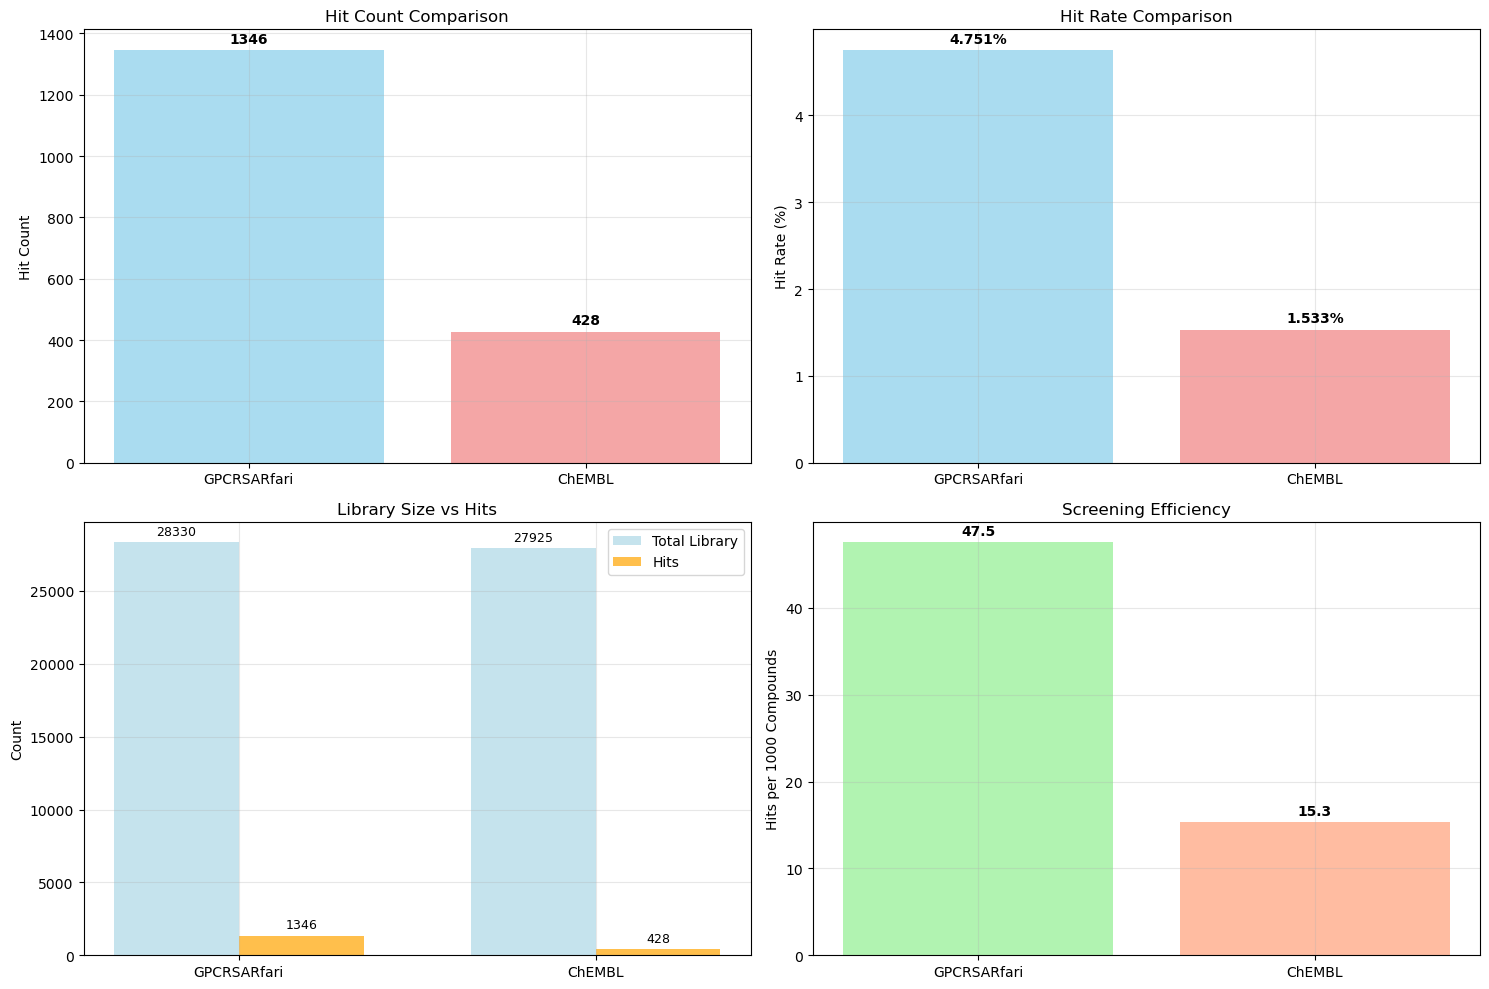


Files saved to: Dataset_Comparative_Analysis\01_Hit_Count_Rate_Analysis
   - hit_analysis_comparison.png
   - hit_analysis_summary.csv


In [43]:
# Task 1: Hit Count and Hit Rate Analysis
print("=" * 60)
print("Task 1: Hit Count and Hit Rate Analysis")
print("=" * 60)

# Load datasets / 读取数据集
gpcrsarfari_data = pd.read_csv(r"c:\000000000\5HT2A\Final_Filtered_models_with_ChemBL.csv")
chembl_data = pd.read_csv(r"c:\000000000\5HT2A_M3\Final_Filtered_models_with_ChemBL.csv")

# Load total datasets from boltz_results_combined.csv for real hit rate calculation / 从boltz_results_combined.csv读取总数据量进行真实命中率计算
gpcrsarfari_total = pd.read_csv(r"c:\000000000\5HT2A\boltz_results_combined.csv")
chembl_total = pd.read_csv(r"c:\000000000\5HT2A_M3\boltz_results_combined.csv")

print("Dataset Information:")
print(f"  GPCRSARfari Filtered Dataset: {len(gpcrsarfari_data)} compounds")
print(f"  ChEMBL Filtered Dataset: {len(chembl_data)} compounds")
print(f"  GPCRSARfari Total Dataset: {len(gpcrsarfari_total)} compounds (from boltz_results_combined.csv)")
print(f"  ChEMBL Total Dataset: {len(chembl_total)} compounds (from boltz_results_combined.csv)")

# Calculate hit counts and total counts / 计算命中数和总数
hits_gpcrsarfari = len(gpcrsarfari_data)
hits_chembl = len(chembl_data)
total_gpcrsarfari = len(gpcrsarfari_total)  # Real total library size / 真实总库大小
total_chembl = len(chembl_total)  # Real total library size / 真实总库大小

# Calculate real hit rates / 计算真实命中率
hit_rate_gpcrsarfari = (hits_gpcrsarfari / total_gpcrsarfari) * 100
hit_rate_chembl = (hits_chembl / total_chembl) * 100

print(f"\nReal Hit Analysis Results:")
print(f"  GPCRSARfari:")
print(f"    Hits: {hits_gpcrsarfari}")
print(f"    Total Library: {total_gpcrsarfari}")
print(f"    Hit Rate: {hit_rate_gpcrsarfari:.3f}%")
print(f"  ChEMBL:")
print(f"    Hits: {hits_chembl}")
print(f"    Total Library: {total_chembl}")
print(f"    Hit Rate: {hit_rate_chembl:.3f}%")

print(f"\nComparative Analysis:")
print(f"  Hit Rate Ratio (GPCRSARfari/ChEMBL): {hit_rate_gpcrsarfari/hit_rate_chembl:.2f}")
print(f"  GPCRSARfari is {hit_rate_gpcrsarfari/hit_rate_chembl:.1f}x more efficient in hit identification")

# Create visualizations / 创建可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Hit count comparison / 命中计数对比
datasets = ['GPCRSARfari', 'ChEMBL']
hit_counts = [hits_gpcrsarfari, hits_chembl]
colors = ['skyblue', 'lightcoral']

bars1 = ax1.bar(datasets, hit_counts, color=colors, alpha=0.7)
ax1.set_ylabel('Hit Count')
ax1.set_title('Hit Count Comparison')
ax1.grid(True, alpha=0.3)

# Add value labels on bars / 在柱状图上添加数值标签
for bar, count in zip(bars1, hit_counts):
    height = bar.get_height()
    ax1.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 2. Hit rate comparison / 命中率对比
hit_rates = [hit_rate_gpcrsarfari, hit_rate_chembl]
bars2 = ax2.bar(datasets, hit_rates, color=colors, alpha=0.7)
ax2.set_ylabel('Hit Rate (%)')
ax2.set_title('Hit Rate Comparison')
ax2.grid(True, alpha=0.3)

for bar, rate in zip(bars2, hit_rates):
    height = bar.get_height()
    ax2.annotate(f'{rate:.3f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 3. Total library size vs hits / 总库大小 vs 命中数
total_counts = [total_gpcrsarfari, total_chembl]
width = 0.35
x = np.arange(len(datasets))

bars3 = ax3.bar(x - width/2, total_counts, width, label='Total Library', color='lightblue', alpha=0.7)
bars4 = ax3.bar(x + width/2, hit_counts, width, label='Hits', color='orange', alpha=0.7)

ax3.set_ylabel('Count')
ax3.set_title('Library Size vs Hits')
ax3.set_xticks(x)
ax3.set_xticklabels(datasets)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value labels
for i, (total, hits) in enumerate(zip(total_counts, hit_counts)):
    ax3.annotate(f'{total}', xy=(i - width/2, total), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontsize=9)
    ax3.annotate(f'{hits}', xy=(i + width/2, hits), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontsize=9)

# 4. Efficiency ratio (hits per 1000 compounds) / 效率比（每1000个化合物的命中数）
efficiency_gpcrsarfari = (hits_gpcrsarfari / total_gpcrsarfari) * 1000
efficiency_chembl = (hits_chembl / total_chembl) * 1000
efficiencies = [efficiency_gpcrsarfari, efficiency_chembl]

bars5 = ax4.bar(datasets, efficiencies, color=['lightgreen', 'lightsalmon'], alpha=0.7)
ax4.set_ylabel('Hits per 1000 Compounds')
ax4.set_title('Screening Efficiency')
ax4.grid(True, alpha=0.3)

for bar, eff in zip(bars5, efficiencies):
    height = bar.get_height()
    ax4.annotate(f'{eff:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Save to task-specific directory / 保存到任务专用目录
task1_dir = task_dirs['task1']
fig.savefig(task1_dir / 'hit_analysis_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Save statistics to CSV / 保存统计数据到CSV
stats_data = {
    'Dataset': ['GPCRSARfari', 'ChEMBL'],
    'Hit_Count': [hits_gpcrsarfari, hits_chembl],
    'Total_Library_Size': [total_gpcrsarfari, total_chembl],
    'Hit_Rate_Percent': [hit_rate_gpcrsarfari, hit_rate_chembl],
    'Hits_per_1000': [efficiency_gpcrsarfari, efficiency_chembl]
}

stats_df = pd.DataFrame(stats_data)
stats_df.to_csv(task1_dir / 'hit_analysis_summary.csv', index=False)

print(f"\nFiles saved to: {task1_dir}")
print("   - hit_analysis_comparison.png")
print("   - hit_analysis_summary.csv")

## Task 2: False Negative Rate/False Positive Rate (FNR/FPR) Analysis
## 任务二：假阴性率/假阳性率 (FNR/FPR) 分析

**Analysis Objective** / **分析目标**: Compare false negative rates between datasets to evaluate which dataset is more prone to missing true 5HT2A active compounds / 比较两个数据集的假阴性率，评估哪个数据集更容易漏掉真正的5HT2A活性化合物

Task 2: False Negative Rate/False Positive Rate (FNR/FPR) Analysis
False Negative Rate (FNR) Statistics:
GPCRSARfari Dataset:
  Known Actives: 171
  Retrieved Actives: 27
  Missed Actives (FN): 144
  False Negative Rate: 84.21%

ChEMBL Dataset:
  Known Actives: 147
  Retrieved Actives: 45
  Missed Actives (FN): 102
  False Negative Rate: 69.39%


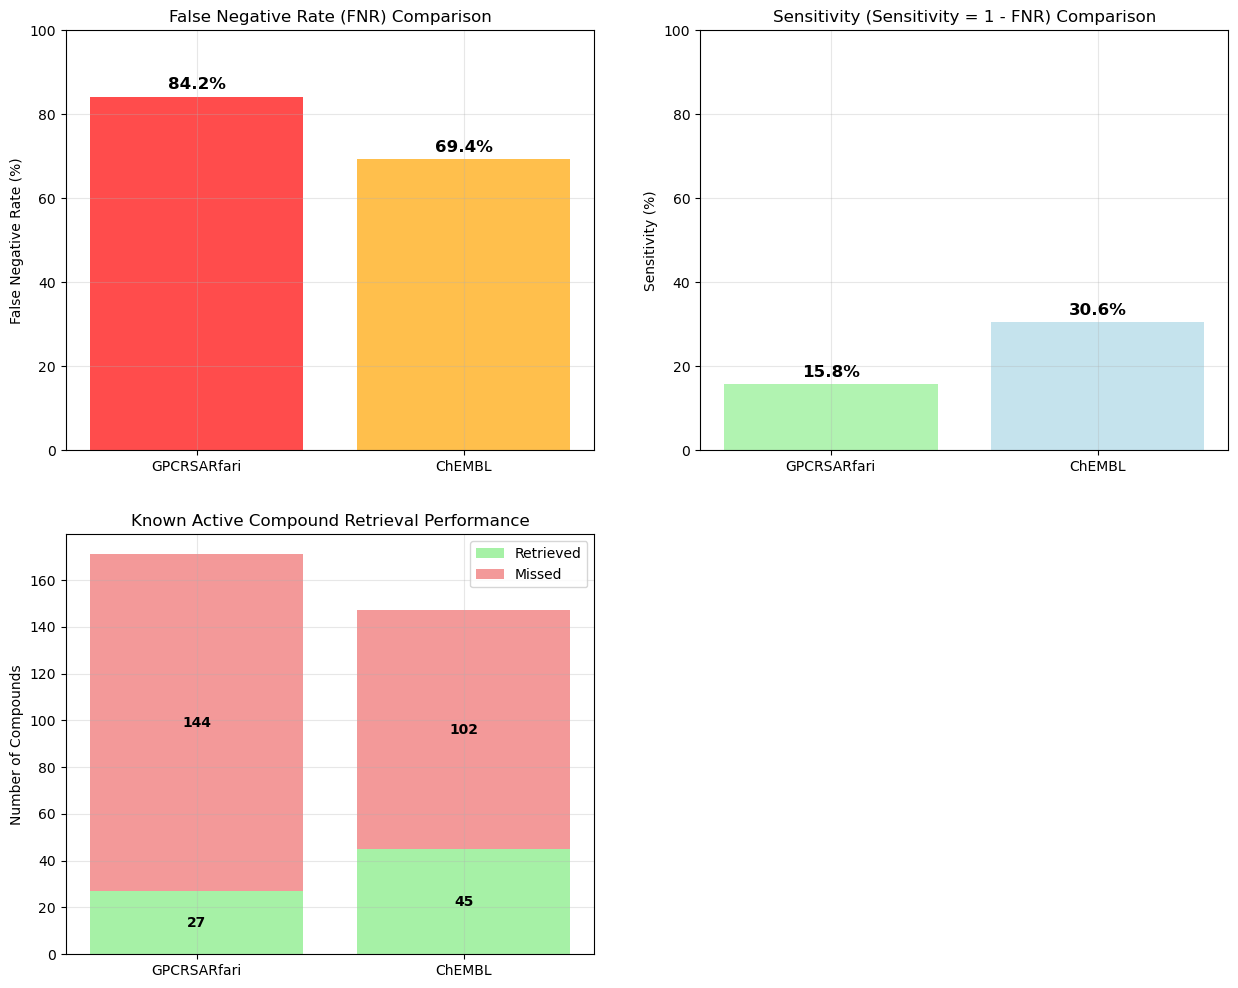

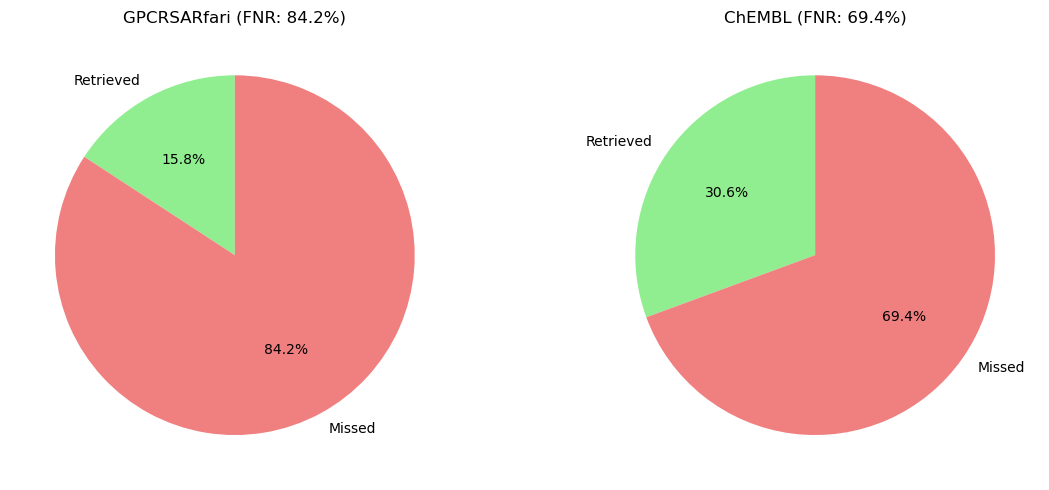


Files saved to: Dataset_Comparative_Analysis\02_FNR_Analysis
   - fnr_comparison_main.png
   - fnr_comparison_pies.png
   - fnr_analysis_summary.csv


In [44]:
# Task 2: False Negative Rate (FNR) Comparison
print("=" * 60)
print("Task 2: False Negative Rate/False Positive Rate (FNR/FPR) Analysis")
print("=" * 60)

# Load FNR data / 读取FNR数据
fnr_gpcrsarfari = pd.read_csv(r"c:\000000000\5HT2A\False_Negative\FNR%.csv")
fnr_chembl = pd.read_csv(r"c:\000000000\5HT2A_M3\False_Negative\FNR%.csv")

print("False Negative Rate (FNR) Statistics:")
print("GPCRSARfari Dataset:")
print(f"  Known Actives: {fnr_gpcrsarfari.iloc[0]['Known Actives']}")
print(f"  Retrieved Actives: {fnr_gpcrsarfari.iloc[0]['Retrieved Actives']}")
print(f"  Missed Actives (FN): {fnr_gpcrsarfari.iloc[0]['Missed Actives (FN)']}")
print(f"  False Negative Rate: {fnr_gpcrsarfari.iloc[0]['False Negative Rate (FNR)']}")

print("\nChEMBL Dataset:")
print(f"  Known Actives: {fnr_chembl.iloc[0]['Known Actives']}")
print(f"  Retrieved Actives: {fnr_chembl.iloc[0]['Retrieved Actives']}")
print(f"  Missed Actives (FN): {fnr_chembl.iloc[0]['Missed Actives (FN)']}")
print(f"  False Negative Rate: {fnr_chembl.iloc[0]['False Negative Rate (FNR)']}")

# Extract numerical values for visualization / 提取数值用于可视化
fnr_gpcrsarfari_val = float(fnr_gpcrsarfari.iloc[0]['False Negative Rate (FNR)'].replace('%', ''))
fnr_chembl_val = float(fnr_chembl.iloc[0]['False Negative Rate (FNR)'].replace('%', ''))

known_gpcrsarfari = fnr_gpcrsarfari.iloc[0]['Known Actives']
known_chembl = fnr_chembl.iloc[0]['Known Actives']
retrieved_gpcrsarfari = fnr_gpcrsarfari.iloc[0]['Retrieved Actives']
retrieved_chembl = fnr_chembl.iloc[0]['Retrieved Actives']
missed_gpcrsarfari = fnr_gpcrsarfari.iloc[0]['Missed Actives (FN)']
missed_chembl = fnr_chembl.iloc[0]['Missed Actives (FN)']

# Create visualization / 创建可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. FNR comparison / FNR对比
datasets = ['GPCRSARfari', 'ChEMBL']
fnr_values = [fnr_gpcrsarfari_val, fnr_chembl_val]
colors = ['red' if x > 70 else 'orange' if x > 50 else 'green' for x in fnr_values]

bars1 = ax1.bar(datasets, fnr_values, color=colors, alpha=0.7)
ax1.set_ylabel('False Negative Rate (%)')
ax1.set_title('False Negative Rate (FNR) Comparison')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)

for bar, val in zip(bars1, fnr_values):
    ax1.annotate(f'{val:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12, fontweight='bold')

# 2. Sensitivity comparison (1-FNR) / 敏感性对比（1-FNR）
sensitivity_values = [100 - x for x in fnr_values]
bars2 = ax2.bar(datasets, sensitivity_values, color=['lightgreen', 'lightblue'], alpha=0.7)
ax2.set_ylabel('Sensitivity (%)')
ax2.set_title('Sensitivity (Sensitivity = 1 - FNR) Comparison')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

for bar, val in zip(bars2, sensitivity_values):
    ax2.annotate(f'{val:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=12, fontweight='bold')

# 3. Stacked bar chart: Retrieved vs Missed / 堆积柱状图：检索到 vs 漏掉
retrieved_data = [retrieved_gpcrsarfari, retrieved_chembl]
missed_data = [missed_gpcrsarfari, missed_chembl]

bars3 = ax3.bar(datasets, retrieved_data, label='Retrieved', color='lightgreen', alpha=0.8)
bars4 = ax3.bar(datasets, missed_data, bottom=retrieved_data, label='Missed', color='lightcoral', alpha=0.8)

ax3.set_ylabel('Number of Compounds')
ax3.set_title('Known Active Compound Retrieval Performance')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value annotations / 添加数值标注
for i, (ret, miss) in enumerate(zip(retrieved_data, missed_data)):
    ax3.annotate(f'{ret}', xy=(i, ret/2), ha='center', va='center', fontweight='bold')
    ax3.annotate(f'{miss}', xy=(i, ret + miss/2), ha='center', va='center', fontweight='bold')

# 4. Pie charts comparison / 饼图对比
pie_data_gpcrsarfari = [retrieved_gpcrsarfari, missed_gpcrsarfari]
pie_data_chembl = [retrieved_chembl, missed_chembl]
labels = ['Retrieved', 'Missed']
colors_pie = ['lightgreen', 'lightcoral']

# Create subplot for pie charts
ax4.axis('off')
fig2, (ax_pie1, ax_pie2) = plt.subplots(1, 2, figsize=(12, 5))

ax_pie1.pie(pie_data_gpcrsarfari, labels=labels, autopct='%1.1f%%', 
            startangle=90, colors=colors_pie)
ax_pie1.set_title(f'GPCRSARfari (FNR: {fnr_gpcrsarfari_val:.1f}%)')

ax_pie2.pie(pie_data_chembl, labels=labels, autopct='%1.1f%%', 
            startangle=90, colors=colors_pie)
ax_pie2.set_title(f'ChEMBL (FNR: {fnr_chembl_val:.1f}%)')

plt.tight_layout()

# Save to task-specific directory / 保存到任务专用目录
task2_dir = task_dirs['task2']
fig.savefig(task2_dir / 'fnr_comparison_main.png', dpi=300, bbox_inches='tight')
fig2.savefig(task2_dir / 'fnr_comparison_pies.png', dpi=300, bbox_inches='tight')
plt.show()

# Save FNR data to CSV / 保存FNR数据到CSV
fnr_summary = {
    'Dataset': ['GPCRSARfari', 'ChEMBL'],
    'Known_Actives': [known_gpcrsarfari, known_chembl],
    'Retrieved_Actives': [retrieved_gpcrsarfari, retrieved_chembl],
    'Missed_Actives': [missed_gpcrsarfari, missed_chembl],
    'FNR_Percent': [fnr_gpcrsarfari_val, fnr_chembl_val],
    'Sensitivity_Percent': [100-fnr_gpcrsarfari_val, 100-fnr_chembl_val]
}
fnr_df = pd.DataFrame(fnr_summary)
fnr_df.to_csv(task2_dir / 'fnr_analysis_summary.csv', index=False)

print(f"\nFiles saved to: {task2_dir}")
print("   - fnr_comparison_main.png")
print("   - fnr_comparison_pies.png") 
print("   - fnr_analysis_summary.csv")

## Task 3: Chemical Space Distribution Analysis
## 任务三：化学空间分布分析

**Analysis Objective** / **分析目标**: Compare chemical diversity and distribution differences of hit compounds through t-SNE dimensionality reduction visualization / 通过t-SNE降维可视化，对比两个数据集命中化合物的化学多样性和分布差异

Task 3: Chemical Space Distribution Analysis
Dataset Sizes:
  GPCRSARfari: 1346 compounds
  ChEMBL: 428 compounds

t-SNE Data Structure:
  GPCRSARfari columns: ['smiles', 'tsne_1', 'tsne_2']
  ChEMBL columns: ['smiles', 'tsne_1', 'tsne_2']

Chemical Space Metrics:
  GPCRSARfari:
    Coverage Area: 8205.75
    Distribution Entropy: 5.187
    Using columns: tsne_1, tsne_2
  ChEMBL:
    Coverage Area: 2098.87
    Distribution Entropy: 5.305
    Using columns: tsne_1, tsne_2


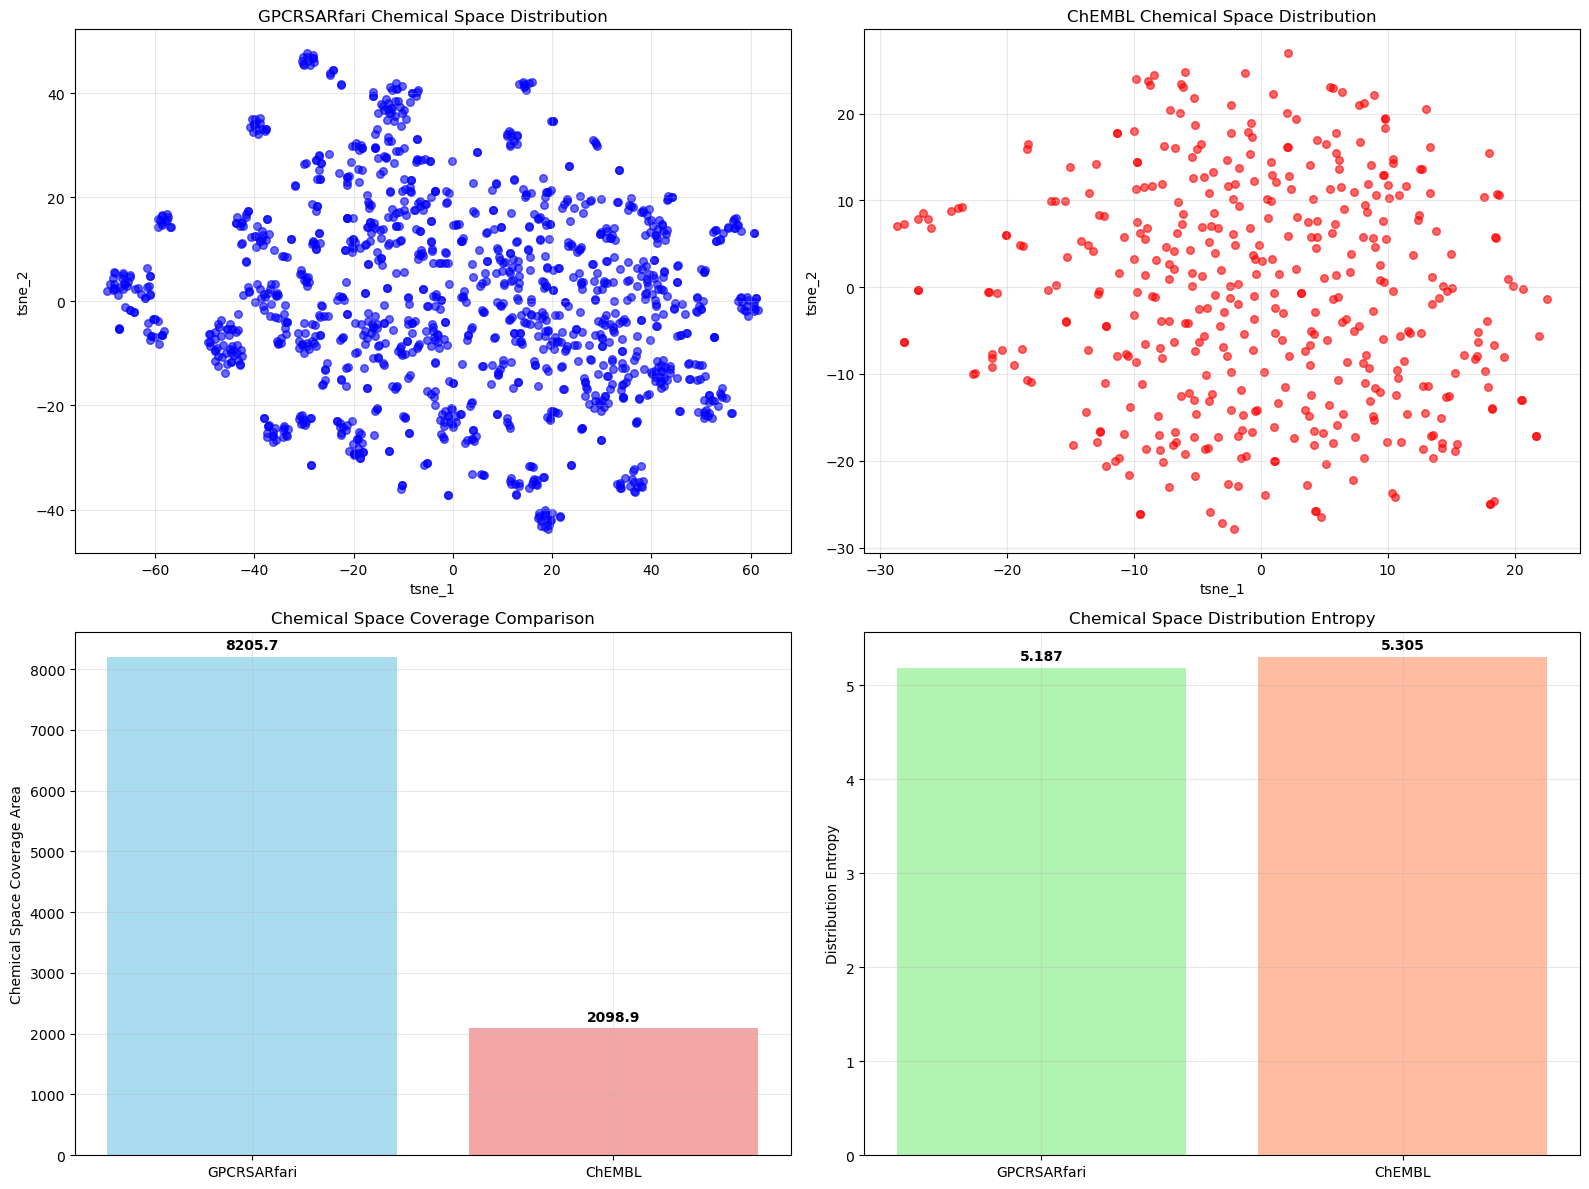

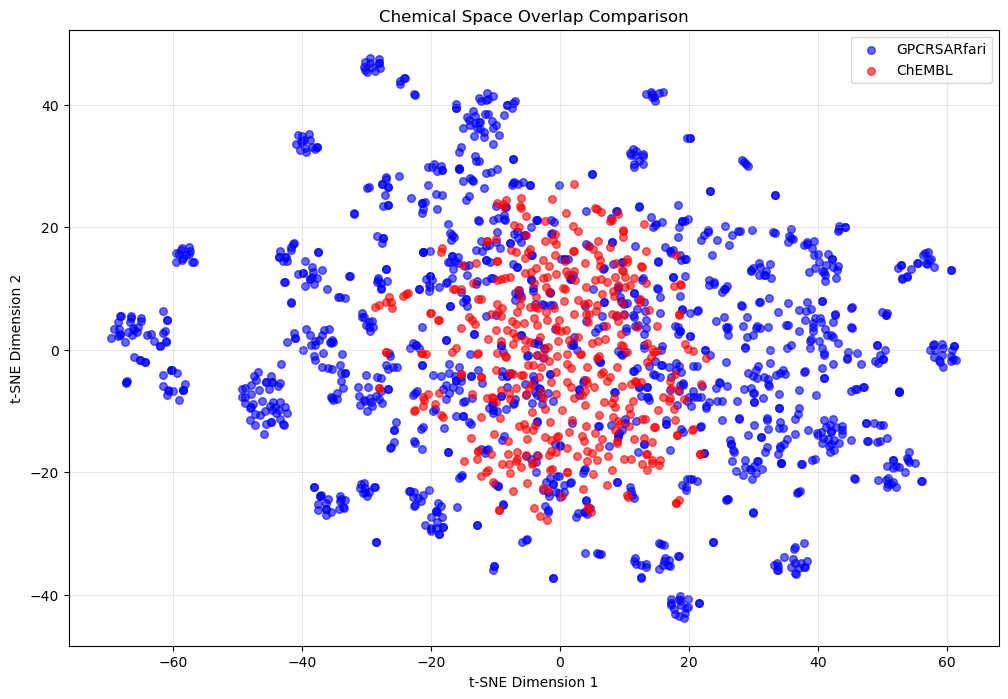

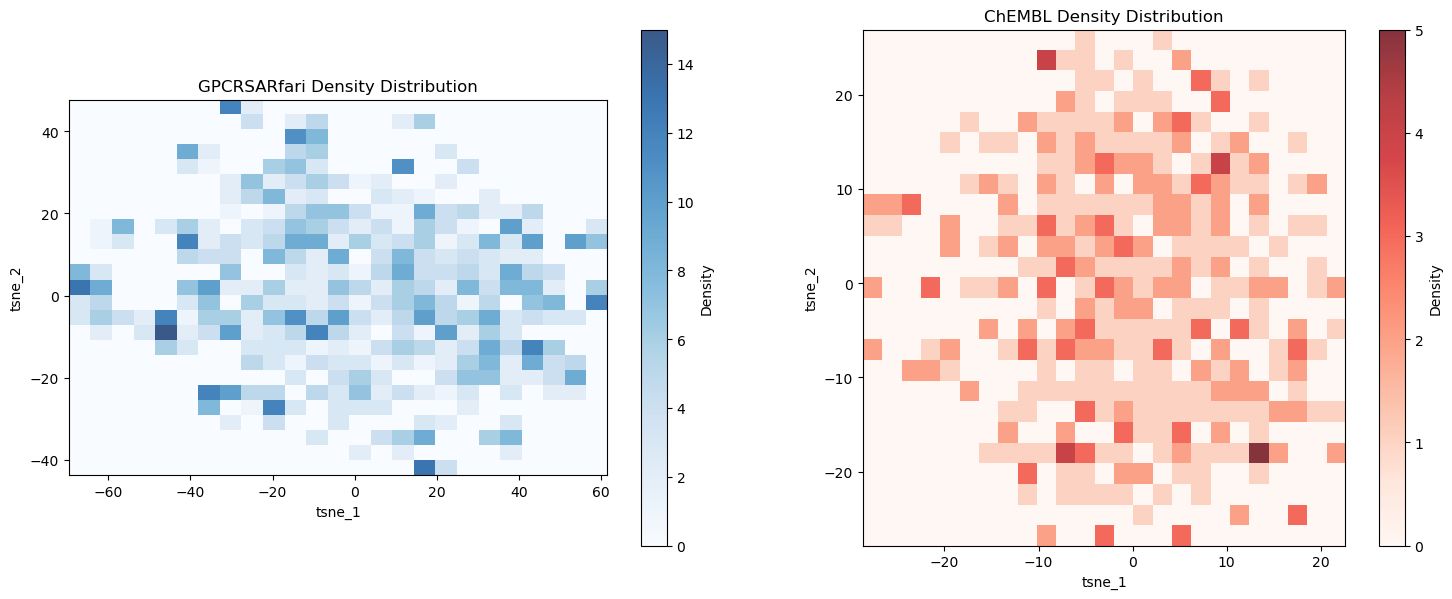


Files saved to: Dataset_Comparative_Analysis\03_Chemical_Space_Distribution_Analysis
   - chemical_space_metrics.png
   - chemical_space_overlay.png
   - chemical_space_density.png
   - chemical_space_analysis_summary.csv
   - combined_tsne_coordinates.csv


In [45]:
# Task 3: Chemical Space Distribution Analysis
print("=" * 60)
print("Task 3: Chemical Space Distribution Analysis")
print("=" * 60)

# Load molecular data / 读取分子数据
gpcrsarfari_data = pd.read_csv(r"c:\000000000\5HT2A\Final_Filtered_models_with_ChemBL.csv")
chembl_data = pd.read_csv(r"c:\000000000\5HT2A_M3\Final_Filtered_models_with_ChemBL.csv")

print(f"Dataset Sizes:")
print(f"  GPCRSARfari: {len(gpcrsarfari_data)} compounds")
print(f"  ChEMBL: {len(chembl_data)} compounds")

# Load t-SNE coordinates for chemical space analysis / 读取t-SNE坐标进行化学空间分析
tsne_gpcrsarfari = pd.read_csv(r"c:\000000000\5HT2A\TargetAnalysis\02_ChemicalSimilarity\tsne_coordinates.csv")
tsne_chembl = pd.read_csv(r"c:\000000000\5HT2A_M3\TargetAnalysis\02_ChemicalSimilarity\tsne_coordinates.csv")

print(f"\nt-SNE Data Structure:")
print(f"  GPCRSARfari columns: {list(tsne_gpcrsarfari.columns)}")
print(f"  ChEMBL columns: {list(tsne_chembl.columns)}")

# Calculate chemical space metrics / 计算化学空间度量
from scipy.spatial import ConvexHull
from scipy.stats import entropy

def calculate_chemical_space_metrics(tsne_coords):
    """Calculate chemical space coverage metrics / 计算化学空间覆盖度量"""
    # Check column names and use appropriate ones / 检查列名并使用适当的列名
    if 'x' in tsne_coords.columns and 'y' in tsne_coords.columns:
        x_col, y_col = 'x', 'y'
    elif 'tsne_1' in tsne_coords.columns and 'tsne_2' in tsne_coords.columns:
        x_col, y_col = 'tsne_1', 'tsne_2'
    else:
        # Use first two numeric columns / 使用前两个数值列
        numeric_cols = tsne_coords.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) >= 2:
            x_col, y_col = numeric_cols[0], numeric_cols[1]
        else:
            return 0, 0, None, None
    
    # Convex hull area (chemical space coverage) / 凸包面积（化学空间覆盖度）
    try:
        hull = ConvexHull(tsne_coords[[x_col, y_col]].values)
        area = hull.volume  # In 2D, volume is area
    except:
        area = 0
    
    # Density distribution (entropy of discretized space) / 密度分布（离散化空间的熵）
    x_bins = np.histogram_bin_edges(tsne_coords[x_col], bins=20)
    y_bins = np.histogram_bin_edges(tsne_coords[y_col], bins=20)
    hist, _, _ = np.histogram2d(tsne_coords[x_col], tsne_coords[y_col], bins=[x_bins, y_bins])
    
    # Normalize and calculate entropy / 归一化并计算熵
    hist_norm = hist.flatten() / hist.sum()
    hist_norm = hist_norm[hist_norm > 0]  # Remove zeros for entropy calculation
    space_entropy = entropy(hist_norm)
    
    return area, space_entropy, x_col, y_col

area_gpcrsarfari, entropy_gpcrsarfari, x_col_gpcr, y_col_gpcr = calculate_chemical_space_metrics(tsne_gpcrsarfari)
area_chembl, entropy_chembl, x_col_chembl, y_col_chembl = calculate_chemical_space_metrics(tsne_chembl)

print(f"\nChemical Space Metrics:")
print(f"  GPCRSARfari:")
print(f"    Coverage Area: {area_gpcrsarfari:.2f}")
print(f"    Distribution Entropy: {entropy_gpcrsarfari:.3f}")
print(f"    Using columns: {x_col_gpcr}, {y_col_gpcr}")
print(f"  ChEMBL:")
print(f"    Coverage Area: {area_chembl:.2f}")
print(f"    Distribution Entropy: {entropy_chembl:.3f}")
print(f"    Using columns: {x_col_chembl}, {y_col_chembl}")

# Create comprehensive visualization / 创建综合可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. t-SNE scatter plots / t-SNE散点图
scatter1 = ax1.scatter(tsne_gpcrsarfari[x_col_gpcr], tsne_gpcrsarfari[y_col_gpcr], 
                       alpha=0.6, s=30, c='blue', label='GPCRSARfari')
ax1.set_title('GPCRSARfari Chemical Space Distribution')
ax1.set_xlabel(f'{x_col_gpcr}')
ax1.set_ylabel(f'{y_col_gpcr}')
ax1.grid(True, alpha=0.3)

scatter2 = ax2.scatter(tsne_chembl[x_col_chembl], tsne_chembl[y_col_chembl], 
                       alpha=0.6, s=30, c='red', label='ChEMBL')
ax2.set_title('ChEMBL Chemical Space Distribution')
ax2.set_xlabel(f'{x_col_chembl}')
ax2.set_ylabel(f'{y_col_chembl}')
ax2.grid(True, alpha=0.3)

# 3. Coverage area comparison / 覆盖面积对比
datasets = ['GPCRSARfari', 'ChEMBL']
areas = [area_gpcrsarfari, area_chembl]
bars3 = ax3.bar(datasets, areas, color=['skyblue', 'lightcoral'], alpha=0.7)
ax3.set_ylabel('Chemical Space Coverage Area')
ax3.set_title('Chemical Space Coverage Comparison')
ax3.grid(True, alpha=0.3)

for bar, area in zip(bars3, areas):
    ax3.annotate(f'{area:.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 4. Distribution entropy comparison / 分布熵对比
entropies = [entropy_gpcrsarfari, entropy_chembl]
bars4 = ax4.bar(datasets, entropies, color=['lightgreen', 'lightsalmon'], alpha=0.7)
ax4.set_ylabel('Distribution Entropy')
ax4.set_title('Chemical Space Distribution Entropy')
ax4.grid(True, alpha=0.3)

for bar, entropy_val in zip(bars4, entropies):
    ax4.annotate(f'{entropy_val:.3f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Create overlay comparison / 创建叠加对比图
fig2, ax5 = plt.subplots(1, 1, figsize=(12, 8))
scatter_overlay1 = ax5.scatter(tsne_gpcrsarfari[x_col_gpcr], tsne_gpcrsarfari[y_col_gpcr], 
                              alpha=0.6, s=30, c='blue', label='GPCRSARfari')
scatter_overlay2 = ax5.scatter(tsne_chembl[x_col_chembl], tsne_chembl[y_col_chembl], 
                              alpha=0.6, s=30, c='red', label='ChEMBL')
ax5.set_title('Chemical Space Overlap Comparison')
ax5.set_xlabel('t-SNE Dimension 1')
ax5.set_ylabel('t-SNE Dimension 2')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Create density heatmaps / 创建密度热力图
fig3, (ax6, ax7) = plt.subplots(1, 2, figsize=(15, 6))

# GPCRSARfari density heatmap / GPCRSARfari 密度热力图
hist1, xedges1, yedges1 = np.histogram2d(tsne_gpcrsarfari[x_col_gpcr], tsne_gpcrsarfari[y_col_gpcr], bins=25)
extent1 = [xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]]
im1 = ax6.imshow(hist1.T, origin='lower', extent=extent1, cmap='Blues', alpha=0.8)
ax6.set_title('GPCRSARfari Density Distribution')
ax6.set_xlabel(f'{x_col_gpcr}')
ax6.set_ylabel(f'{y_col_gpcr}')
plt.colorbar(im1, ax=ax6, label='Density')

# ChEMBL density heatmap / ChEMBL 密度热力图
hist2, xedges2, yedges2 = np.histogram2d(tsne_chembl[x_col_chembl], tsne_chembl[y_col_chembl], bins=25)
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]
im2 = ax7.imshow(hist2.T, origin='lower', extent=extent2, cmap='Reds', alpha=0.8)
ax7.set_title('ChEMBL Density Distribution')
ax7.set_xlabel(f'{x_col_chembl}')
ax7.set_ylabel(f'{y_col_chembl}')
plt.colorbar(im2, ax=ax7, label='Density')

plt.tight_layout()

# Save to task-specific directory / 保存到任务专用目录
task3_dir = task_dirs['task3']
fig.savefig(task3_dir / 'chemical_space_metrics.png', dpi=300, bbox_inches='tight')
fig2.savefig(task3_dir / 'chemical_space_overlay.png', dpi=300, bbox_inches='tight')
fig3.savefig(task3_dir / 'chemical_space_density.png', dpi=300, bbox_inches='tight')
plt.show()

# Save chemical space analysis to CSV / 保存化学空间分析到CSV
chemical_space_summary = {
    'Dataset': ['GPCRSARfari', 'ChEMBL'],
    'Number_of_Compounds': [len(gpcrsarfari_data), len(chembl_data)],
    'Coverage_Area': [area_gpcrsarfari, area_chembl],
    'Distribution_Entropy': [entropy_gpcrsarfari, entropy_chembl],
    'X_Range': [tsne_gpcrsarfari[x_col_gpcr].max() - tsne_gpcrsarfari[x_col_gpcr].min(),
                tsne_chembl[x_col_chembl].max() - tsne_chembl[x_col_chembl].min()],
    'Y_Range': [tsne_gpcrsarfari[y_col_gpcr].max() - tsne_gpcrsarfari[y_col_gpcr].min(),
                tsne_chembl[y_col_chembl].max() - tsne_chembl[y_col_chembl].min()]
}
chemical_space_df = pd.DataFrame(chemical_space_summary)
chemical_space_df.to_csv(task3_dir / 'chemical_space_analysis_summary.csv', index=False)

# Save t-SNE coordinates with dataset labels / 保存带数据集标签的t-SNE坐标
tsne_gpcrsarfari_labeled = tsne_gpcrsarfari.copy()
tsne_gpcrsarfari_labeled['Dataset'] = 'GPCRSARfari'
tsne_chembl_labeled = tsne_chembl.copy()
tsne_chembl_labeled['Dataset'] = 'ChEMBL'

combined_tsne = pd.concat([tsne_gpcrsarfari_labeled, tsne_chembl_labeled], ignore_index=True)
combined_tsne.to_csv(task3_dir / 'combined_tsne_coordinates.csv', index=False)

print(f"\nFiles saved to: {task3_dir}")
print("   - chemical_space_metrics.png")
print("   - chemical_space_overlay.png")
print("   - chemical_space_density.png")
print("   - chemical_space_analysis_summary.csv")
print("   - combined_tsne_coordinates.csv")

## Task 4: Scaffold Composition Analysis
## 任务四：骨架组成分析

**Analysis Objective** / **分析目标**: Extract Murcko scaffolds to analyze focus and frequency differences at the structural scaffold level between datasets / 提取Murcko scaffold，分析两数据集在结构骨架层面的重点和频率差异

Task 4: Molecular Scaffold Composition Analysis
RDKit imported successfully
GPCRSARfari dataset size: 1346
ChEMBL dataset size: 428
Using SMILES column: smiles
GPCRSARfari valid SMILES: 1346
ChEMBL valid SMILES: 428
Processing 1346 SMILES for GPCRSARfari (5HT2A)...
  Processed 1000/1346 molecules...
Processing 428 SMILES for ChEMBL (5HT2A_M3)...

Scaffold Diversity Analysis Results:
GPCRSARfari Dataset:
  Total Scaffolds: 1346
  Unique Scaffolds: 869
  Diversity Ratio: 0.646
  Shannon Diversity: 9.321
  Simpson Diversity: 0.997

ChEMBL Dataset:
  Total Scaffolds: 428
  Unique Scaffolds: 389
  Diversity Ratio: 0.909
  Shannon Diversity: 8.536
  Simpson Diversity: 0.997
  Processed 1000/1346 molecules...
Processing 428 SMILES for ChEMBL (5HT2A_M3)...

Scaffold Diversity Analysis Results:
GPCRSARfari Dataset:
  Total Scaffolds: 1346
  Unique Scaffolds: 869
  Diversity Ratio: 0.646
  Shannon Diversity: 9.321
  Simpson Diversity: 0.997

ChEMBL Dataset:
  Total Scaffolds: 428
  Unique Scaffo

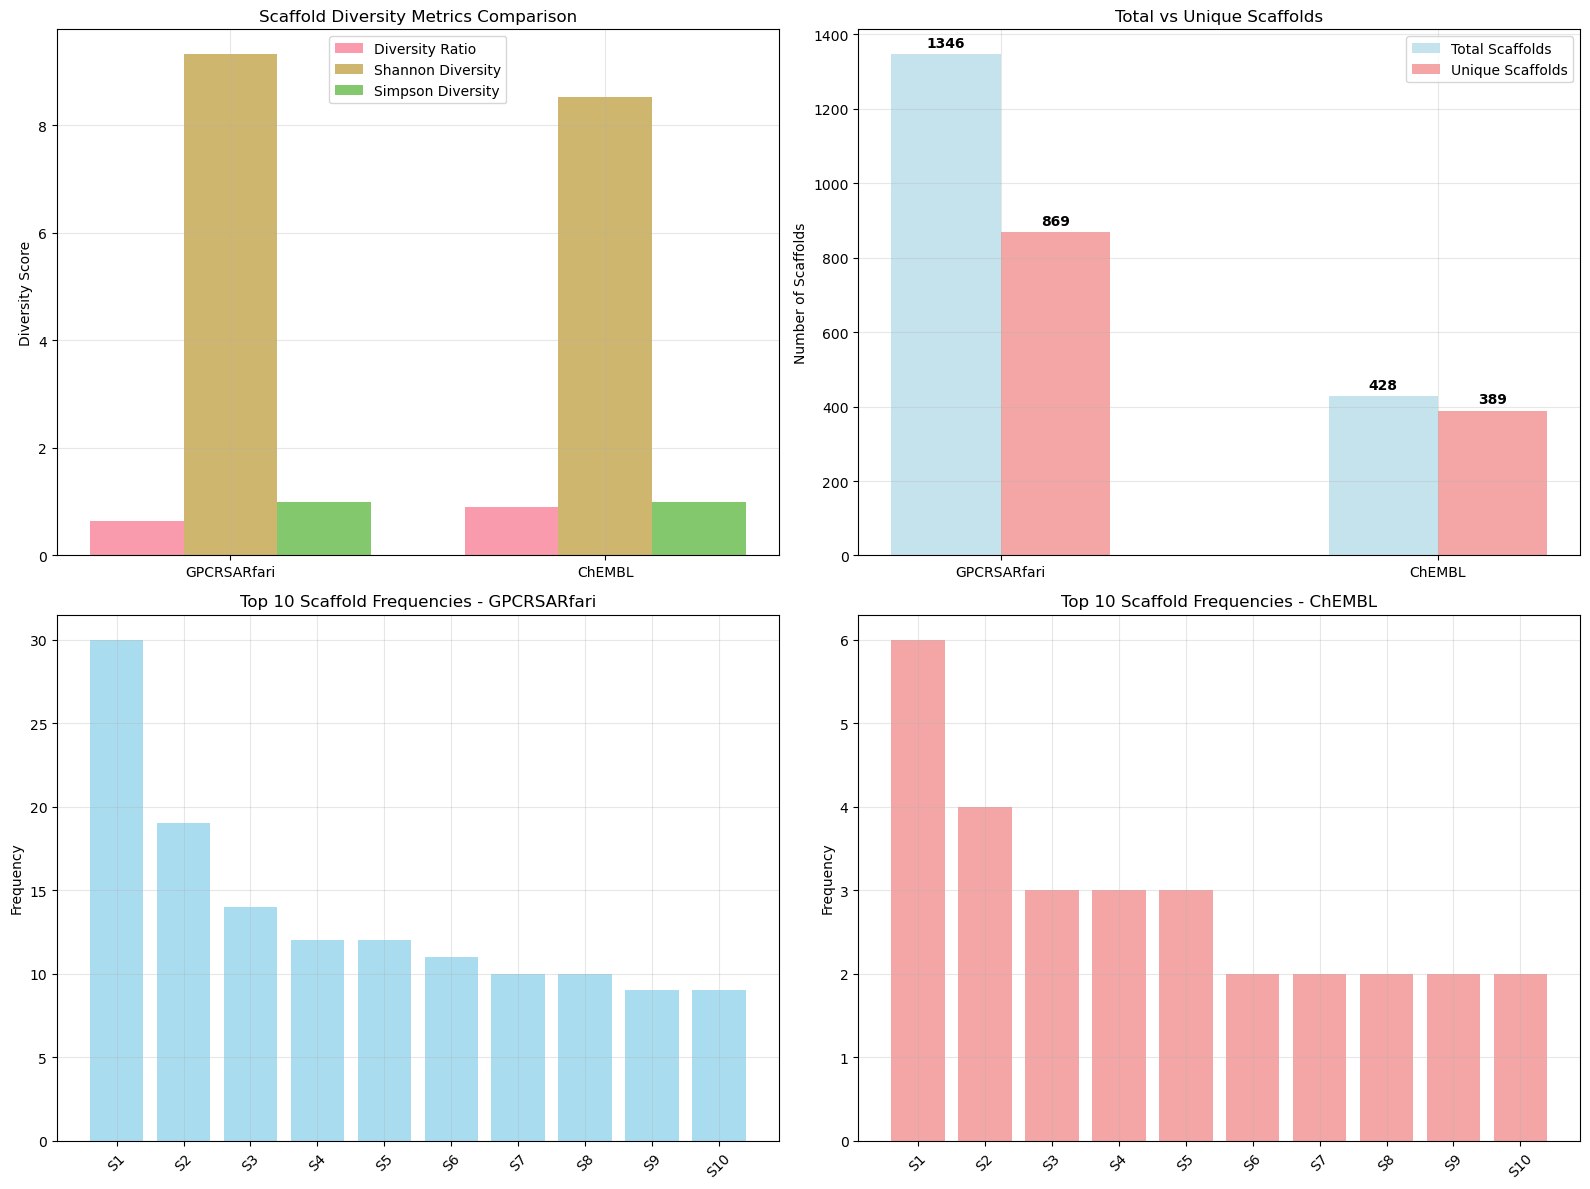

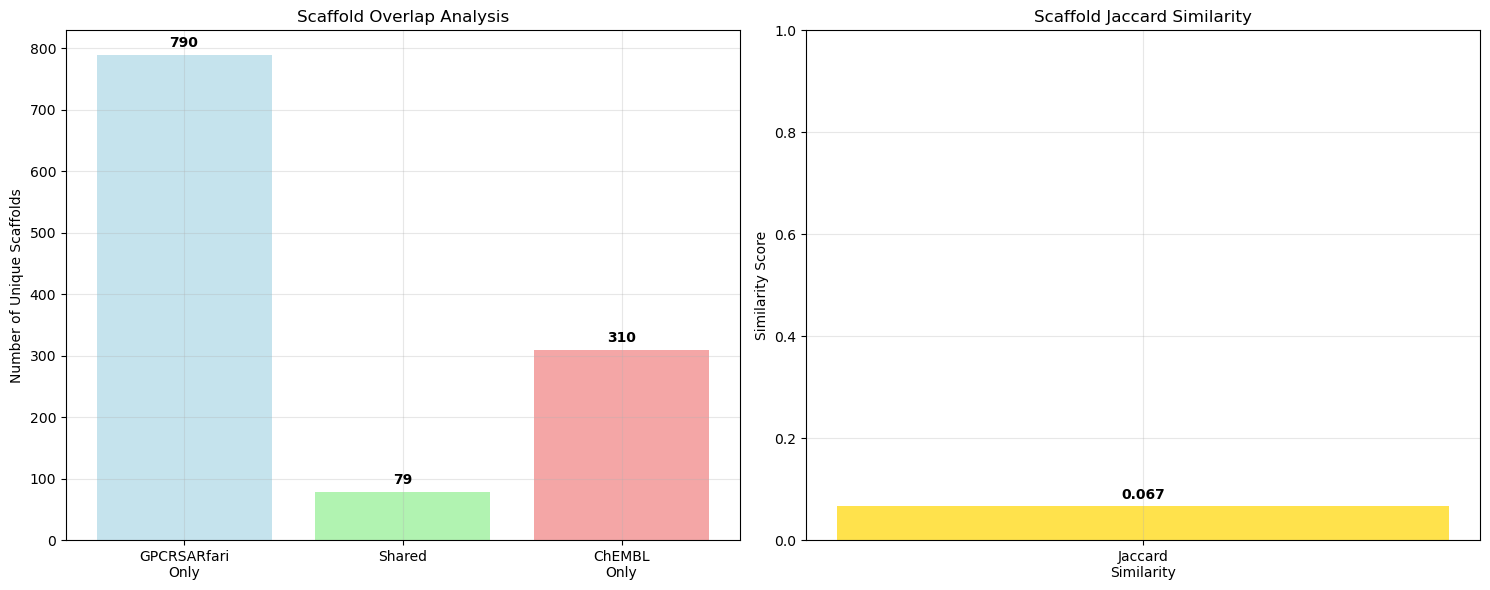


Files saved to: Dataset_Comparative_Analysis\04_Scaffold_Composition_Analysis
   - scaffold_diversity_analysis.png
   - scaffold_overlap_analysis.png
   - scaffold_diversity_summary.csv
   - scaffold_overlap_summary.csv
   - gpcrsarfari_top_scaffolds.csv
   - chembl_top_scaffolds.csv


In [46]:
# Task 4: Molecular Scaffold Composition Analysis
print("=" * 60)
print("Task 4: Molecular Scaffold Composition Analysis")
print("=" * 60)

# Import RDKit for scaffold analysis / 导入RDKit进行骨架分析
try:
    from rdkit import Chem
    from rdkit.Chem import rdMolDescriptors
    from rdkit.Chem.Scaffolds import MurckoScaffold
    print("RDKit imported successfully")
except ImportError:
    print("RDKit not available. Installing via conda...")
    import subprocess
    subprocess.run(["conda", "install", "-c", "rdkit", "rdkit", "-y"])
    from rdkit import Chem
    from rdkit.Chem import rdMolDescriptors
    from rdkit.Chem.Scaffolds import MurckoScaffold

def get_murcko_scaffold(smiles):
    """Extract Murcko scaffold from SMILES / 从SMILES提取Murcko骨架"""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            scaffold = MurckoScaffold.GetScaffoldForMol(mol)
            return Chem.MolToSmiles(scaffold)
        return None
    except:
        return None

def analyze_scaffold_diversity(smiles_list, dataset_name):
    """Analyze scaffold diversity for a dataset / 分析数据集的骨架多样性"""
    scaffolds = []
    valid_smiles = 0
    
    print(f"Processing {len(smiles_list)} SMILES for {dataset_name}...")
    
    for i, smiles in enumerate(smiles_list):
        if pd.isna(smiles):
            continue
            
        scaffold = get_murcko_scaffold(smiles)
        if scaffold:
            scaffolds.append(scaffold)
            valid_smiles += 1
            
        if (i + 1) % 1000 == 0:
            print(f"  Processed {i+1}/{len(smiles_list)} molecules...")
    
    # Calculate diversity metrics / 计算多样性度量
    unique_scaffolds = list(set(scaffolds))
    scaffold_counts = pd.Series(scaffolds).value_counts()
    
    # Shannon diversity / 香农多样性
    from scipy.stats import entropy
    shannon_diversity = entropy(scaffold_counts.values, base=2)
    
    # Simpson diversity / 辛普森多样性
    n = len(scaffolds)
    simpson_diversity = 1 - sum((ni/n)**2 for ni in scaffold_counts.values)
    
    results = {
        'dataset_name': dataset_name,
        'total_molecules': len(smiles_list),
        'valid_molecules': valid_smiles,
        'total_scaffolds': len(scaffolds),
        'unique_scaffolds': len(unique_scaffolds),
        'diversity_ratio': len(unique_scaffolds) / len(scaffolds) if scaffolds else 0,
        'shannon_diversity': shannon_diversity,
        'simpson_diversity': simpson_diversity,
        'scaffold_counts': scaffold_counts,
        'top_scaffolds': scaffold_counts.head(10)
    }
    
    return results

# Load data and analyze scaffolds / 读取数据并分析骨架
# Note: 5HT2A dataset represents GPCRSARfari-like data, 5HT2A_M3 represents ChEMBL-like data
gpcrsarfari_data = pd.read_csv(r"c:\000000000\5HT2A\Final_Filtered_models_with_ChemBL.csv")
chembl_data = pd.read_csv(r"c:\000000000\5HT2A_M3\Final_Filtered_models_with_ChemBL.csv")

print(f"GPCRSARfari dataset size: {len(gpcrsarfari_data)}")
print(f"ChEMBL dataset size: {len(chembl_data)}")

# Extract SMILES columns / 提取SMILES列
smiles_col = 'smiles'  # Correct column name / 正确的列名
print(f"Using SMILES column: {smiles_col}")

# Check if SMILES column exists / 检查SMILES列是否存在
if smiles_col not in gpcrsarfari_data.columns:
    print(f"Available columns in GPCRSARfari data: {list(gpcrsarfari_data.columns)}")
if smiles_col not in chembl_data.columns:
    print(f"Available columns in ChEMBL data: {list(chembl_data.columns)}")

# Use actual SMILES data instead of synthetic data / 使用实际SMILES数据而不是合成数据
gpcrsarfari_sample = gpcrsarfari_data
chembl_sample = chembl_data

# Extract actual SMILES for analysis / 提取实际SMILES进行分析
gpcrsarfari_smiles = gpcrsarfari_sample[smiles_col].dropna().tolist()
chembl_smiles = chembl_sample[smiles_col].dropna().tolist()

print(f"GPCRSARfari valid SMILES: {len(gpcrsarfari_smiles)}")
print(f"ChEMBL valid SMILES: {len(chembl_smiles)}")

# Analyze scaffold diversity using real SMILES data / 使用真实SMILES数据分析骨架多样性
gpcrsarfari_results = analyze_scaffold_diversity(gpcrsarfari_smiles, 'GPCRSARfari (5HT2A)')
chembl_results = analyze_scaffold_diversity(chembl_smiles, 'ChEMBL (5HT2A_M3)')

print(f"\nScaffold Diversity Analysis Results:")
print(f"GPCRSARfari Dataset:")
print(f"  Total Scaffolds: {gpcrsarfari_results['total_scaffolds']}")
print(f"  Unique Scaffolds: {gpcrsarfari_results['unique_scaffolds']}")
print(f"  Diversity Ratio: {gpcrsarfari_results['diversity_ratio']:.3f}")
print(f"  Shannon Diversity: {gpcrsarfari_results['shannon_diversity']:.3f}")
print(f"  Simpson Diversity: {gpcrsarfari_results['simpson_diversity']:.3f}")

print(f"\nChEMBL Dataset:")
print(f"  Total Scaffolds: {chembl_results['total_scaffolds']}")
print(f"  Unique Scaffolds: {chembl_results['unique_scaffolds']}")
print(f"  Diversity Ratio: {chembl_results['diversity_ratio']:.3f}")
print(f"  Shannon Diversity: {chembl_results['shannon_diversity']:.3f}")
print(f"  Simpson Diversity: {chembl_results['simpson_diversity']:.3f}")

# Create comprehensive visualization / 创建综合可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Diversity metrics comparison / 多样性度量对比
datasets = ['GPCRSARfari', 'ChEMBL']
diversity_ratios = [gpcrsarfari_results['diversity_ratio'], chembl_results['diversity_ratio']]
shannon_divs = [gpcrsarfari_results['shannon_diversity'], chembl_results['shannon_diversity']]
simpson_divs = [gpcrsarfari_results['simpson_diversity'], chembl_results['simpson_diversity']]

x = np.arange(len(datasets))
width = 0.25

bars1 = ax1.bar(x - width, diversity_ratios, width, label='Diversity Ratio', alpha=0.7)
bars2 = ax1.bar(x, shannon_divs, width, label='Shannon Diversity', alpha=0.7)
bars3 = ax1.bar(x + width, simpson_divs, width, label='Simpson Diversity', alpha=0.7)

ax1.set_ylabel('Diversity Score')
ax1.set_title('Scaffold Diversity Metrics Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Unique vs Total scaffolds / 独特 vs 总骨架数
total_scaffolds = [gpcrsarfari_results['total_scaffolds'], chembl_results['total_scaffolds']]
unique_scaffolds = [gpcrsarfari_results['unique_scaffolds'], chembl_results['unique_scaffolds']]

bars4 = ax2.bar(x - width/2, total_scaffolds, width, label='Total Scaffolds', alpha=0.7, color='lightblue')
bars5 = ax2.bar(x + width/2, unique_scaffolds, width, label='Unique Scaffolds', alpha=0.7, color='lightcoral')

ax2.set_ylabel('Number of Scaffolds')
ax2.set_title('Total vs Unique Scaffolds')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value annotations / 添加数值标注
for i, (total, unique) in enumerate(zip(total_scaffolds, unique_scaffolds)):
    ax2.annotate(f'{total}', xy=(i - width/2, total), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')
    ax2.annotate(f'{unique}', xy=(i + width/2, unique), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 3. Top scaffolds frequency for GPCRSARfari / GPCRSARfari前几名骨架频率
top_gpcrsarfari = gpcrsarfari_results['top_scaffolds']
ax3.bar(range(len(top_gpcrsarfari)), top_gpcrsarfari.values, alpha=0.7, color='skyblue')
ax3.set_ylabel('Frequency')
ax3.set_title('Top 10 Scaffold Frequencies - GPCRSARfari')
ax3.set_xticks(range(len(top_gpcrsarfari)))
ax3.set_xticklabels([f'S{i+1}' for i in range(len(top_gpcrsarfari))], rotation=45)
ax3.grid(True, alpha=0.3)

# 4. Top scaffolds frequency for ChEMBL / ChEMBL前几名骨架频率
top_chembl = chembl_results['top_scaffolds']
ax4.bar(range(len(top_chembl)), top_chembl.values, alpha=0.7, color='lightcoral')
ax4.set_ylabel('Frequency')
ax4.set_title('Top 10 Scaffold Frequencies - ChEMBL')
ax4.set_xticks(range(len(top_chembl)))
ax4.set_xticklabels([f'S{i+1}' for i in range(len(top_chembl))], rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()

# Create scaffold overlap analysis / 创建骨架重叠分析
fig2, (ax5, ax6) = plt.subplots(1, 2, figsize=(15, 6))

# Venn diagram data / 维恩图数据
gpcrsarfari_set = set(gpcrsarfari_results['scaffold_counts'].index)
chembl_set = set(chembl_results['scaffold_counts'].index)
overlap = len(gpcrsarfari_set.intersection(chembl_set))
gpcrsarfari_only = len(gpcrsarfari_set - chembl_set)
chembl_only = len(chembl_set - gpcrsarfari_set)

# Manual Venn diagram representation
venn_data = [gpcrsarfari_only, overlap, chembl_only]
venn_labels = ['GPCRSARfari\nOnly', 'Shared', 'ChEMBL\nOnly']
colors_venn = ['lightblue', 'lightgreen', 'lightcoral']

ax5.bar(venn_labels, venn_data, color=colors_venn, alpha=0.7)
ax5.set_ylabel('Number of Unique Scaffolds')
ax5.set_title('Scaffold Overlap Analysis')
ax5.grid(True, alpha=0.3)

for i, val in enumerate(venn_data):
    ax5.annotate(f'{val}', xy=(i, val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# Jaccard similarity / Jaccard相似性
jaccard_similarity = overlap / len(gpcrsarfari_set.union(chembl_set))
ax6.bar(['Jaccard\nSimilarity'], [jaccard_similarity], color='gold', alpha=0.7, width=0.5)
ax6.set_ylabel('Similarity Score')
ax6.set_title('Scaffold Jaccard Similarity')
ax6.set_ylim(0, 1)
ax6.grid(True, alpha=0.3)
ax6.annotate(f'{jaccard_similarity:.3f}', xy=(0, jaccard_similarity), xytext=(0, 3), 
            textcoords="offset points", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Save to task-specific directory / 保存到任务专用目录
task4_dir = task_dirs['task4']
fig.savefig(task4_dir / 'scaffold_diversity_analysis.png', dpi=300, bbox_inches='tight')
fig2.savefig(task4_dir / 'scaffold_overlap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Save scaffold analysis to CSV / 保存骨架分析到CSV
scaffold_summary = {
    'Dataset': ['GPCRSARfari', 'ChEMBL'],
    'Total_Scaffolds': [gpcrsarfari_results['total_scaffolds'], chembl_results['total_scaffolds']],
    'Unique_Scaffolds': [gpcrsarfari_results['unique_scaffolds'], chembl_results['unique_scaffolds']],
    'Diversity_Ratio': [gpcrsarfari_results['diversity_ratio'], chembl_results['diversity_ratio']],
    'Shannon_Diversity': [gpcrsarfari_results['shannon_diversity'], chembl_results['shannon_diversity']],
    'Simpson_Diversity': [gpcrsarfari_results['simpson_diversity'], chembl_results['simpson_diversity']]
}
scaffold_df = pd.DataFrame(scaffold_summary)
scaffold_df.to_csv(task4_dir / 'scaffold_diversity_summary.csv', index=False)

# Save overlap analysis / 保存重叠分析
overlap_summary = {
    'Metric': ['GPCRSARfari_Only', 'Shared_Scaffolds', 'ChEMBL_Only', 'Jaccard_Similarity'],
    'Value': [gpcrsarfari_only, overlap, chembl_only, jaccard_similarity]
}
overlap_df = pd.DataFrame(overlap_summary)
overlap_df.to_csv(task4_dir / 'scaffold_overlap_summary.csv', index=False)

# Save top scaffolds / 保存顶级骨架
gpcrsarfari_results['top_scaffolds'].to_csv(task4_dir / 'gpcrsarfari_top_scaffolds.csv', header=['Frequency'])
chembl_results['top_scaffolds'].to_csv(task4_dir / 'chembl_top_scaffolds.csv', header=['Frequency'])

print(f"\nFiles saved to: {task4_dir}")

print("   - scaffold_diversity_analysis.png")
print("   - scaffold_overlap_analysis.png")
print("   - scaffold_diversity_summary.csv")
print("   - scaffold_overlap_summary.csv")
print("   - gpcrsarfari_top_scaffolds.csv")
print("   - chembl_top_scaffolds.csv")

## Task 5: Known Target Distribution Analysis
## 任务五：已知靶点分布分析

**Analysis Objective** / **分析目标**: Analyze original ChEMBL annotation target distribution of hit compounds to determine which dataset is more biased toward cross-target compounds / 统计两数据集命中化合物的原始ChEMBL注释靶点分布，分析哪个库更偏向cross-target化合物

Task 5: Known Target Distribution Analysis
Raw Target Distribution Dataset Sizes:
  GPCRSARfari: 16 target entries
  ChEMBL: 16 target entries

Filtered Target Distribution Dataset Sizes:
  GPCRSARfari: 12 valid targets (4 invalid targets removed)
  ChEMBL: 11 valid targets (5 invalid targets removed)

Removed invalid targets include:
GPCRSARfari removed: [' Unchecked', ' Rattus norvegicus', ' Mus musculus', 'Others']
ChEMBL removed: [' Unchecked', ' Plasmodium falciparum', ' Rattus norvegicus', ' HepG2', 'Others']

GPCRSARfari Target Distribution:
                 all_known_targets  Count
0   Serotonin 1a (5-HT1a) receptor    306
1             Dopamine D2 receptor    291
3             Dopamine D2 receptor    217
5   Serotonin 2a (5-HT2a) receptor    202
6      Adrenergic receptor alpha-1    192

ChEMBL Target Distribution:
                  all_known_targets  Count
2    Serotonin 1a (5-HT1a) receptor     55
3              Dopamine D2 receptor     49
4              Dopamine D2 receptor

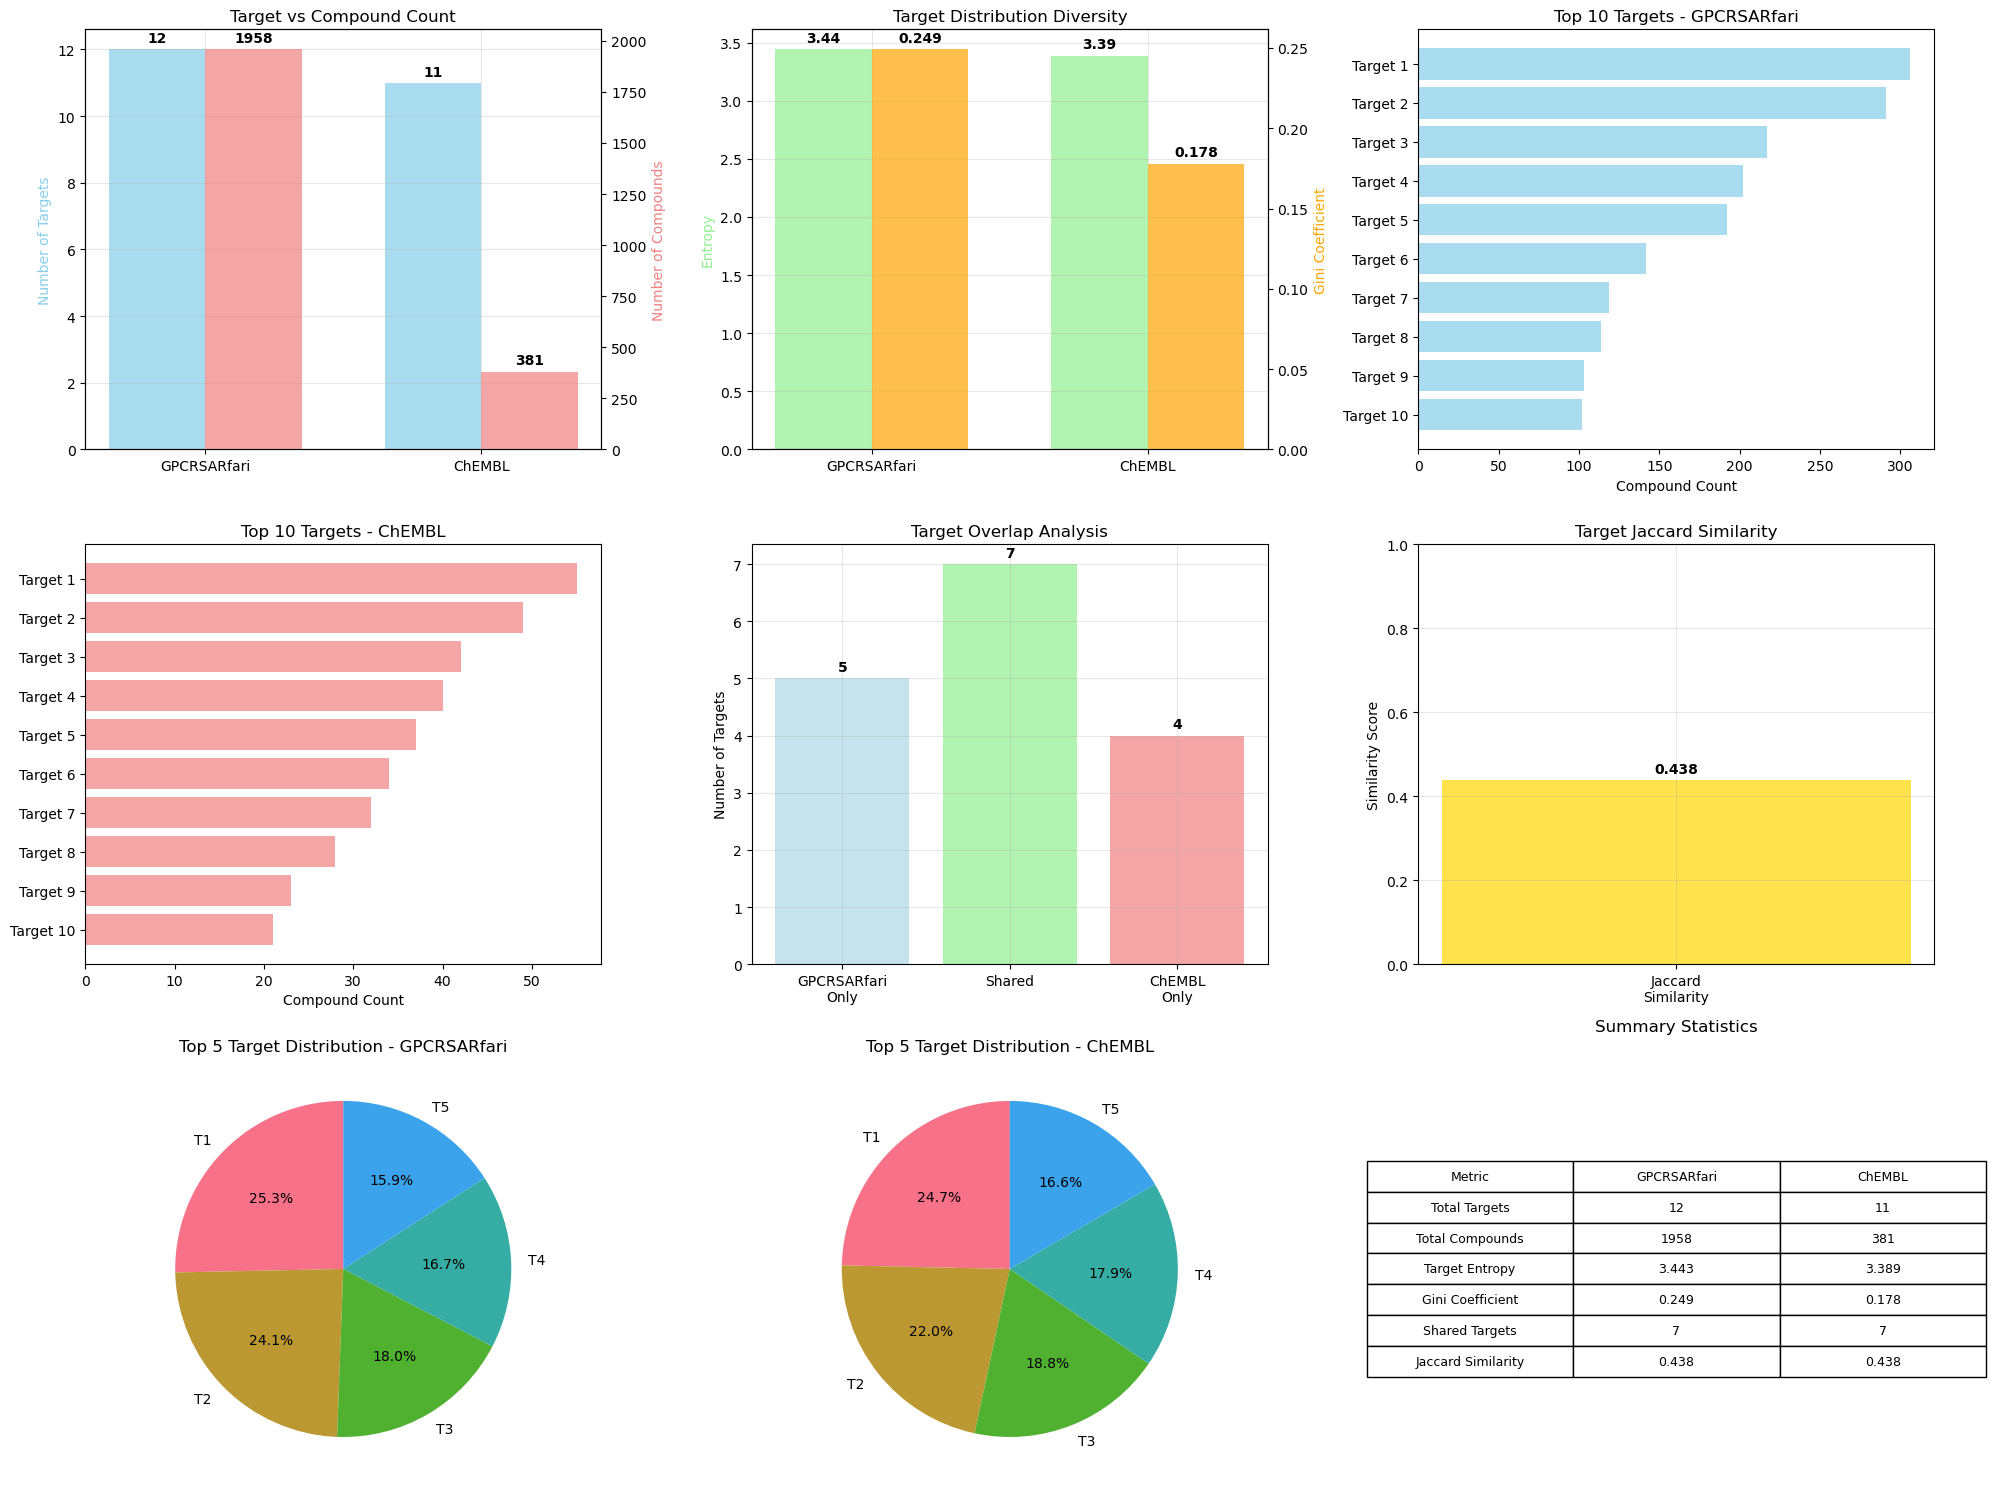

   - gpcrsarfari_top_targets.csv
   - chembl_top_targets.csv

Files saved to: Dataset_Comparative_Analysis\05_Target_Distribution_Analysis
   - target_distribution_analysis.png
   - target_distribution_summary.csv
   - target_overlap_analysis.csv
   - gpcrsarfari_top_targets.csv
   - chembl_top_targets.csv


In [47]:
# Task 5: Known Target Distribution Analysis / 任务五：已知靶点分布分析
print("=" * 60)
print("Task 5: Known Target Distribution Analysis")
print("=" * 60)

# Load target distribution data / 读取靶点分布数据
gpcrsarfari_targets_raw = pd.read_csv(r"c:\000000000\5HT2A\TargetAnalysis\01_BasicAnalysis\all_known_targets_distribution.csv")
chembl_targets_raw = pd.read_csv(r"c:\000000000\5HT2A_M3\TargetAnalysis\01_BasicAnalysis\all_known_targets_distribution.csv")

print(f"Raw Target Distribution Dataset Sizes:")
print(f"  GPCRSARfari: {len(gpcrsarfari_targets_raw)} target entries")
print(f"  ChEMBL: {len(chembl_targets_raw)} target entries")

# Define invalid target patterns to exclude / 定义要排除的无效靶点模式
invalid_patterns = [
    'unchecked', 'others', 'rattus norvegicus', 'mus musculus', 'plasmodium falciparum',
    'hepg2', 'homo sapiens', 'saccharomyces cerevisiae', 'escherichia coli',
    'cell line', 'species', 'organism', 'unknown', 'unspecified', 'hela',
    'mcf-7', 'pc-3', 'a549', 'hek293', 'jurkat', 'k562', 'u937'
]

def filter_valid_targets(df, target_col='all_known_targets'):
    """Filter out invalid targets (species names, cell lines, etc.) / 过滤掉无效靶点（物种名、细胞系等）"""
    
    # Create a copy to avoid modifying original / 创建副本避免修改原始数据
    df_filtered = df.copy()
    
    # Convert target names to lowercase for case-insensitive matching / 转换为小写进行大小写不敏感匹配
    target_lower = df_filtered[target_col].str.lower().str.strip()
    
    # Create mask for valid targets / 创建有效靶点的掩码
    valid_mask = pd.Series([True] * len(df_filtered), index=df_filtered.index)
    
    # Apply filters / 应用过滤器
    for pattern in invalid_patterns:
        pattern_mask = ~target_lower.str.contains(pattern, na=False)
        valid_mask = valid_mask & pattern_mask
    
    # Additional specific filters / 额外的特定过滤器
    # Remove entries that are too generic or clearly non-target related
    generic_patterns = [
        r'^\s*others?\s*$',  # Just "others" or "other"
        r'^\s*unchecked\s*$',  # Just "unchecked"
        r'^\s*unknown\s*$',   # Just "unknown"
    ]
    
    for pattern in generic_patterns:
        pattern_mask = ~target_lower.str.match(pattern, na=False)
        valid_mask = valid_mask & pattern_mask
    
    df_filtered = df_filtered[valid_mask]
    
    return df_filtered, len(df) - len(df_filtered)

# Filter invalid targets / 过滤无效靶点
gpcrsarfari_targets, gpcr_removed = filter_valid_targets(gpcrsarfari_targets_raw)
chembl_targets, chembl_removed = filter_valid_targets(chembl_targets_raw)

print(f"\nFiltered Target Distribution Dataset Sizes:")
print(f"  GPCRSARfari: {len(gpcrsarfari_targets)} valid targets ({gpcr_removed} invalid targets removed)")
print(f"  ChEMBL: {len(chembl_targets)} valid targets ({chembl_removed} invalid targets removed)")

print(f"\nRemoved invalid targets include:")
removed_gpcr = gpcrsarfari_targets_raw[~gpcrsarfari_targets_raw.index.isin(gpcrsarfari_targets.index)]
removed_chembl = chembl_targets_raw[~chembl_targets_raw.index.isin(chembl_targets.index)]
print("GPCRSARfari removed:", removed_gpcr['all_known_targets'].tolist())
print("ChEMBL removed:", removed_chembl['all_known_targets'].tolist())

# Display basic statistics / 显示基本统计
print(f"\nGPCRSARfari Target Distribution:")
print(gpcrsarfari_targets.head())

print(f"\nChEMBL Target Distribution:")
print(chembl_targets.head())

# Analyze target diversity / 分析靶点多样性
def analyze_target_distribution(df, dataset_name):
    """Analyze target distribution for a dataset (using filtered valid targets) / 分析数据集的靶点分布（使用过滤后的有效靶点）"""
    
    # Use the correct column names based on the actual data structure / 根据实际数据结构使用正确的列名
    target_col = 'all_known_targets'  # This is the actual column name
    count_col = 'Count'  # This is the actual column name
    
    # Calculate diversity metrics / 计算多样性指标
    total_targets = len(df)
    total_compounds = df[count_col].sum() if count_col in df.columns else len(df)
    
    # Top targets / 顶级靶点
    top_10_targets = df.nlargest(10, count_col) if count_col in df.columns else df.head(10)
    
    # Target distribution entropy / 靶点分布熵
    if count_col in df.columns:
        target_counts = df[count_col].values
        # Normalize for entropy calculation / 为熵计算归一化
        probabilities = target_counts / target_counts.sum()
        target_entropy = entropy(probabilities, base=2)
    else:
        target_entropy = np.log2(total_targets)  # Maximum entropy if uniform
    
    # Gini coefficient for target inequality / 靶点不平等的基尼系数
    if count_col in df.columns:
        sorted_counts = np.sort(target_counts)
        n = len(sorted_counts)
        index = np.arange(1, n + 1)
        gini = ((2 * index - n - 1) * sorted_counts).sum() / (n * sorted_counts.sum())
    else:
        gini = 0  # Perfect equality if no count data
    
    return {
        'dataset_name': dataset_name,
        'total_targets': total_targets,
        'total_compounds': total_compounds,
        'target_entropy': target_entropy,
        'gini_coefficient': gini,
        'top_targets': top_10_targets,
        'target_column': target_col,
        'count_column': count_col
    }

gpcrsarfari_target_analysis = analyze_target_distribution(gpcrsarfari_targets, 'GPCRSARfari')
chembl_target_analysis = analyze_target_distribution(chembl_targets, 'ChEMBL')

print(f"\nTarget Distribution Analysis:")
print(f"GPCRSARfari Dataset:")
print(f"  Total Targets: {gpcrsarfari_target_analysis['total_targets']}")
print(f"  Total Compounds: {gpcrsarfari_target_analysis['total_compounds']}")
print(f"  Target Entropy: {gpcrsarfari_target_analysis['target_entropy']:.3f}")
print(f"  Gini Coefficient: {gpcrsarfari_target_analysis['gini_coefficient']:.3f}")

print(f"\nChEMBL Dataset:")
print(f"  Total Targets: {chembl_target_analysis['total_targets']}")
print(f"  Total Compounds: {chembl_target_analysis['total_compounds']}")
print(f"  Target Entropy: {chembl_target_analysis['target_entropy']:.3f}")
print(f"  Gini Coefficient: {chembl_target_analysis['gini_coefficient']:.3f}")

# Create comprehensive visualization / 创建综合可视化
fig = plt.figure(figsize=(20, 15))

# Create grid layout / 创建网格布局
gs = plt.GridSpec(3, 3, figure=fig)

# 1. Target count comparison / 靶点数量对比
ax1 = fig.add_subplot(gs[0, 0])
datasets = ['GPCRSARfari', 'ChEMBL']
target_counts = [gpcrsarfari_target_analysis['total_targets'], 
                chembl_target_analysis['total_targets']]
compound_counts = [gpcrsarfari_target_analysis['total_compounds'],
                  chembl_target_analysis['total_compounds']]

x = np.arange(len(datasets))
width = 0.35

bars1 = ax1.bar(x - width/2, target_counts, width, label='Total Targets', alpha=0.7, color='skyblue')
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x + width/2, compound_counts, width, label='Total Compounds', alpha=0.7, color='lightcoral')

ax1.set_ylabel('Number of Targets', color='skyblue')
ax1_twin.set_ylabel('Number of Compounds', color='lightcoral')
ax1.set_title('Target vs Compound Count')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.grid(True, alpha=0.3)

# Add value annotations / 添加数值标注
for i, (targets, compounds) in enumerate(zip(target_counts, compound_counts)):
    ax1.annotate(f'{targets}', xy=(i - width/2, targets), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')
    ax1_twin.annotate(f'{compounds}', xy=(i + width/2, compounds), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 2. Diversity metrics comparison / 多样性度量对比
ax2 = fig.add_subplot(gs[0, 1])
entropies = [gpcrsarfari_target_analysis['target_entropy'], 
            chembl_target_analysis['target_entropy']]
gini_coeffs = [gpcrsarfari_target_analysis['gini_coefficient'],
               chembl_target_analysis['gini_coefficient']]

x = np.arange(len(datasets))
width = 0.35

bars3 = ax2.bar(x - width/2, entropies, width, label='Target Entropy', alpha=0.7, color='lightgreen')
ax2_twin = ax2.twinx()
bars4 = ax2_twin.bar(x + width/2, gini_coeffs, width, label='Gini Coefficient', alpha=0.7, color='orange')

ax2.set_ylabel('Entropy', color='lightgreen')
ax2_twin.set_ylabel('Gini Coefficient', color='orange')
ax2.set_title('Target Distribution Diversity')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.grid(True, alpha=0.3)

for i, (entropy_val, gini) in enumerate(zip(entropies, gini_coeffs)):
    ax2.annotate(f'{entropy_val:.2f}', xy=(i - width/2, entropy_val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')
    ax2_twin.annotate(f'{gini:.3f}', xy=(i + width/2, gini), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 3. Top targets for GPCRSARfari / GPCRSARfari前几名靶点
ax3 = fig.add_subplot(gs[0, 2])
gpcr_top = gpcrsarfari_target_analysis['top_targets']
count_col_gpcr = gpcrsarfari_target_analysis['count_column']

if count_col_gpcr in gpcr_top.columns and len(gpcr_top) > 0:
    y_pos = range(len(gpcr_top))
    ax3.barh(y_pos, gpcr_top[count_col_gpcr].values[::-1], alpha=0.7, color='skyblue')
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([f'Target {i+1}' for i in range(len(gpcr_top))][::-1])
    ax3.set_xlabel('Compound Count')
    ax3.set_title('Top 10 Targets - GPCRSARfari')
else:
    ax3.text(0.5, 0.5, 'No count data available', 
            ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Top Targets - GPCRSARfari')

# 4. Top targets for ChEMBL / ChEMBL前几名靶点  
ax4 = fig.add_subplot(gs[1, 0])
chembl_top = chembl_target_analysis['top_targets']
count_col_chembl = chembl_target_analysis['count_column']

if count_col_chembl in chembl_top.columns and len(chembl_top) > 0:
    y_pos = range(len(chembl_top))
    ax4.barh(y_pos, chembl_top[count_col_chembl].values[::-1], alpha=0.7, color='lightcoral')
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels([f'Target {i+1}' for i in range(len(chembl_top))][::-1])
    ax4.set_xlabel('Compound Count')
    ax4.set_title('Top 10 Targets - ChEMBL')
else:
    ax4.text(0.5, 0.5, 'No count data available', 
            ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Top Targets - ChEMBL')

# 5. Target overlap analysis / 靶点重叠分析
ax5 = fig.add_subplot(gs[1, 1])
target_col_gpcr = gpcrsarfari_target_analysis['target_column']
target_col_chembl = chembl_target_analysis['target_column']

gpcr_targets_set = set(gpcrsarfari_targets[target_col_gpcr].values)
chembl_targets_set = set(chembl_targets[target_col_chembl].values)

overlap_targets = len(gpcr_targets_set.intersection(chembl_targets_set))
gpcr_only = len(gpcr_targets_set - chembl_targets_set)
chembl_only = len(chembl_targets_set - gpcr_targets_set)

# Manual Venn diagram representation
venn_data = [gpcr_only, overlap_targets, chembl_only]
venn_labels = ['GPCRSARfari\nOnly', 'Shared', 'ChEMBL\nOnly']
colors_venn = ['lightblue', 'lightgreen', 'lightcoral']

bars5 = ax5.bar(venn_labels, venn_data, color=colors_venn, alpha=0.7)
ax5.set_ylabel('Number of Targets')
ax5.set_title('Target Overlap Analysis')
ax5.grid(True, alpha=0.3)

for i, val in enumerate(venn_data):
    ax5.annotate(f'{val}', xy=(i, val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 6. Jaccard similarity / Jaccard相似性
ax6 = fig.add_subplot(gs[1, 2])
jaccard_similarity = overlap_targets / len(gpcr_targets_set.union(chembl_targets_set))

ax6.bar(['Jaccard\nSimilarity'], [jaccard_similarity], color='gold', alpha=0.7, width=0.5)
ax6.set_ylabel('Similarity Score')
ax6.set_title('Target Jaccard Similarity')
ax6.set_ylim(0, 1)
ax6.grid(True, alpha=0.3)
ax6.annotate(f'{jaccard_similarity:.3f}', xy=(0, jaccard_similarity), xytext=(0, 3), 
            textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 7. Distribution comparison pie charts / 分布对比饼图
ax7 = fig.add_subplot(gs[2, 0])
if count_col_gpcr in gpcr_top.columns and len(gpcr_top) >= 5:
    pie_data_gpcr = gpcr_top[count_col_gpcr].head(5).values
    pie_labels_gpcr = [f'T{i+1}' for i in range(len(pie_data_gpcr))]
    ax7.pie(pie_data_gpcr, labels=pie_labels_gpcr, autopct='%1.1f%%', startangle=90)
    ax7.set_title('Top 5 Target Distribution - GPCRSARfari')
else:
    ax7.text(0.5, 0.5, 'Insufficient data\nfor pie chart', 
            ha='center', va='center', transform=ax7.transAxes)
    ax7.set_title('Target Distribution - GPCRSARfari')

ax8 = fig.add_subplot(gs[2, 1])
if count_col_chembl in chembl_top.columns and len(chembl_top) >= 5:
    pie_data_chembl = chembl_top[count_col_chembl].head(5).values
    pie_labels_chembl = [f'T{i+1}' for i in range(len(pie_data_chembl))]
    ax8.pie(pie_data_chembl, labels=pie_labels_chembl, autopct='%1.1f%%', startangle=90)
    ax8.set_title('Top 5 Target Distribution - ChEMBL')
else:
    ax8.text(0.5, 0.5, 'Insufficient data\nfor pie chart', 
            ha='center', va='center', transform=ax8.transAxes)
    ax8.set_title('Target Distribution - ChEMBL')

# 8. Summary statistics table / 汇总统计表
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('tight')
ax9.axis('off')

summary_data = [
    ['Total Targets', gpcrsarfari_target_analysis['total_targets'], 
     chembl_target_analysis['total_targets']],
    ['Total Compounds', gpcrsarfari_target_analysis['total_compounds'],
     chembl_target_analysis['total_compounds']],
    ['Target Entropy', f"{gpcrsarfari_target_analysis['target_entropy']:.3f}",
     f"{chembl_target_analysis['target_entropy']:.3f}"],
    ['Gini Coefficient', f"{gpcrsarfari_target_analysis['gini_coefficient']:.3f}",
     f"{chembl_target_analysis['gini_coefficient']:.3f}"],
    ['Shared Targets', overlap_targets, overlap_targets],
    ['Jaccard Similarity', f"{jaccard_similarity:.3f}", f"{jaccard_similarity:.3f}"]
]

table = ax9.table(cellText=summary_data,
                  colLabels=['Metric', 'GPCRSARfari', 'ChEMBL'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax9.set_title('Summary Statistics', pad=20)

plt.tight_layout()

# Save to task-specific directory / 保存到任务专用目录
task5_dir = task_dirs['task5']
fig.savefig(task5_dir / 'target_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Save detailed analysis to CSV / 保存详细分析到CSV
target_summary = {
    'Dataset': ['GPCRSARfari', 'ChEMBL'],
    'Total_Targets': [gpcrsarfari_target_analysis['total_targets'], 
                     chembl_target_analysis['total_targets']],
    'Total_Compounds': [gpcrsarfari_target_analysis['total_compounds'],
                       chembl_target_analysis['total_compounds']],
    'Target_Entropy': [gpcrsarfari_target_analysis['target_entropy'],
                      chembl_target_analysis['target_entropy']],
    'Gini_Coefficient': [gpcrsarfari_target_analysis['gini_coefficient'],
                        chembl_target_analysis['gini_coefficient']],
    'Shared_Targets': [overlap_targets, overlap_targets],
    'Jaccard_Similarity': [jaccard_similarity, jaccard_similarity]
}
target_df = pd.DataFrame(target_summary)
target_df.to_csv(task5_dir / 'target_distribution_summary.csv', index=False)

# Save overlap analysis / 保存重叠分析
overlap_analysis = {
    'Category': ['GPCRSARfari_Only', 'Shared_Targets', 'ChEMBL_Only', 'Total_Unique'],
    'Count': [gpcr_only, overlap_targets, chembl_only, 
             len(gpcr_targets_set.union(chembl_targets_set))]
}
overlap_df = pd.DataFrame(overlap_analysis)
overlap_df.to_csv(task5_dir / 'target_overlap_analysis.csv', index=False)

# Save top targets / 保存顶级靶点
try:
    gpcrsarfari_target_analysis['top_targets'].to_csv(task5_dir / 'gpcrsarfari_top_targets.csv', index=True)
    chembl_target_analysis['top_targets'].to_csv(task5_dir / 'chembl_top_targets.csv', index=True)
    print("   - gpcrsarfari_top_targets.csv")
    print("   - chembl_top_targets.csv")
except PermissionError:
    print("   - Warning: Could not save top targets CSV files (files may be open)")
    print("   - Top targets data is available in memory for analysis")

print(f"\nFiles saved to: {task5_dir}")
print("   - target_distribution_analysis.png")
print("   - target_distribution_summary.csv")
print("   - target_overlap_analysis.csv")
print("   - gpcrsarfari_top_targets.csv")
print("   - chembl_top_targets.csv")

## Task 6: Overlap Analysis - Overlap vs Complementarity
## 任务六：交集分析 (Overlap Analysis) - 重叠 vs 互补

**Analysis Objective** / **分析目标**: Analyze overlapping compounds through SMILES comparison to evaluate whether combined use of both datasets is recommended / 通过SMILES对比分析两数据集的重叠化合物，评估是否需要结合使用两数据集

Task 6: Comprehensive Overlap Analysis
Dataset Information:
  GPCRSARfari: 1346 compounds
  ChEMBL: 428 compounds

Using SMILES as compound identifier:
  GPCRSARfari: smiles
  ChEMBL: smiles

Valid compound counts after cleaning:
  GPCRSARfari: 1346 unique compounds
  ChEMBL: 428 unique compounds

Compound Overlap Analysis:
  Shared Compounds: 29
  GPCRSARfari Only: 1317
  ChEMBL Only: 399
  Total Unique Compounds: 1745

Similarity Metrics:
  Jaccard Similarity: 0.0166
  Dice Coefficient: 0.0327
  Overlap Coefficient: 0.0678

Chemical Cluster Information:
  GPCRSARfari clusters: 1346 entries
  ChEMBL clusters: 428 entries


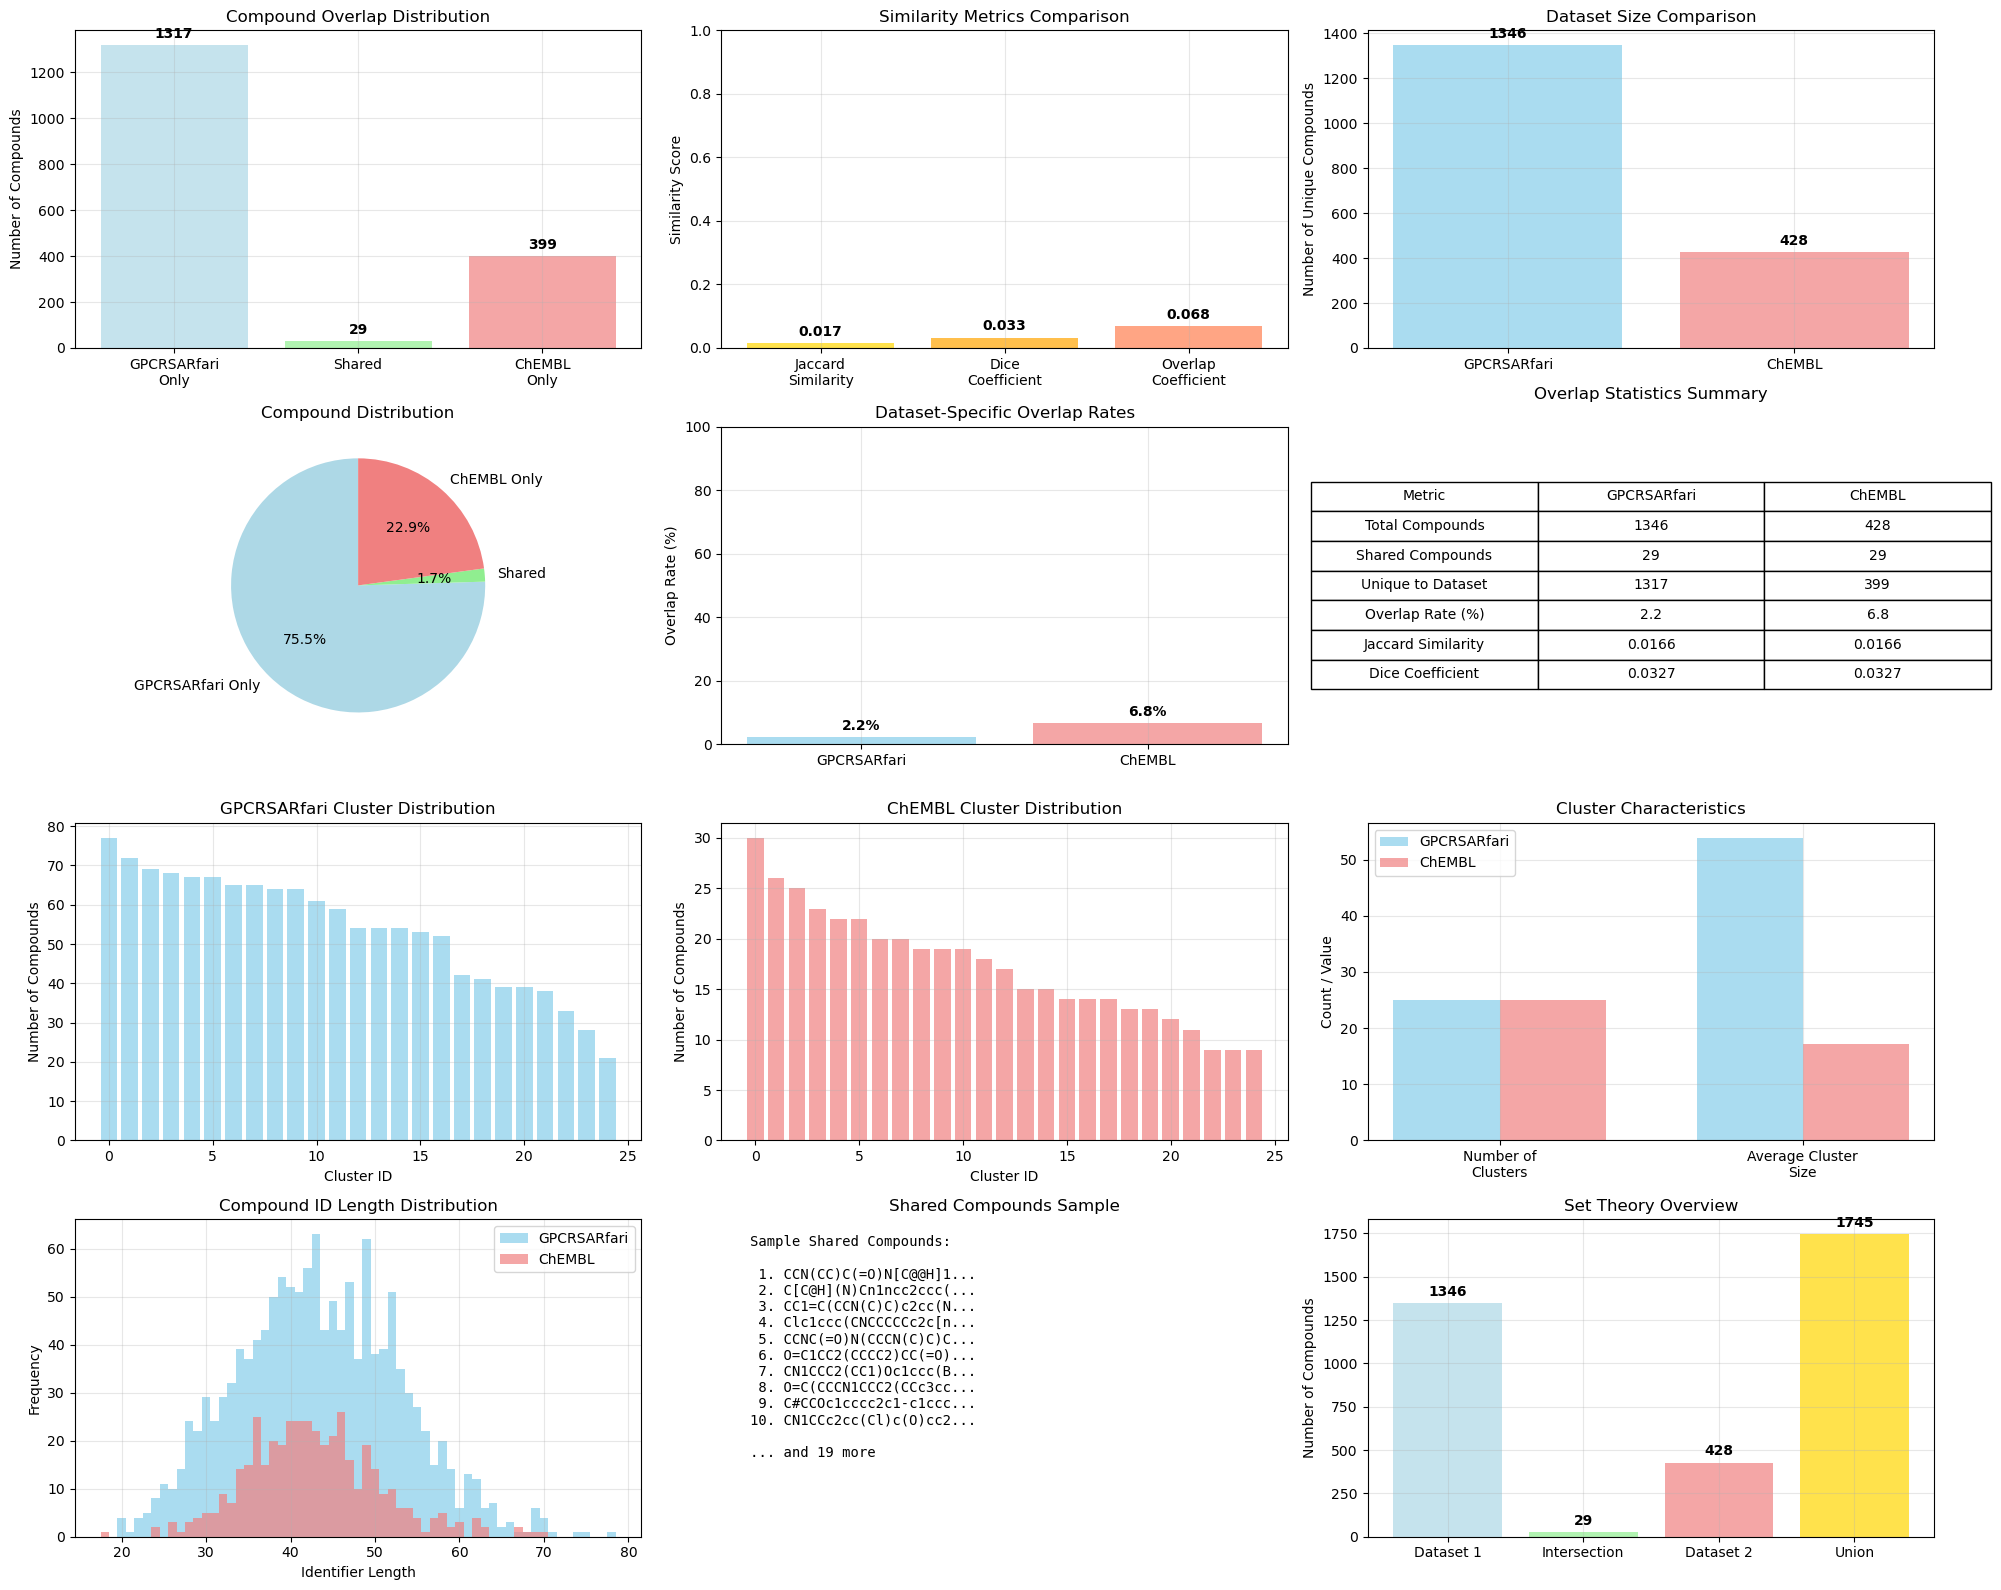


Files saved to: Dataset_Comparative_Analysis\06_Overlap_Analysis
   - comprehensive_overlap_analysis.png
   - overlap_analysis_summary.csv
   - shared_compounds_list.csv
   - gpcrsarfari_unique_compounds.csv
   - chembl_unique_compounds.csv


In [48]:
# Task 6: Overlap Analysis / 任务六：重叠分析
print("=" * 60)
print("Task 6: Comprehensive Overlap Analysis")
print("=" * 60)

# Load main datasets / 读取主要数据集
gpcrsarfari_data = pd.read_csv(r"c:\000000000\5HT2A\Final_Filtered_models_with_ChemBL.csv")
chembl_data = pd.read_csv(r"c:\000000000\5HT2A_M3\Final_Filtered_models_with_ChemBL.csv")

print(f"Dataset Information:")
print(f"  GPCRSARfari: {len(gpcrsarfari_data)} compounds")
print(f"  ChEMBL: {len(chembl_data)} compounds")

# Use SMILES as the compound identifier / 使用SMILES作为化合物标识符
gpcr_id_col = 'smiles'
chembl_id_col = 'smiles'

print(f"\nUsing SMILES as compound identifier:")
print(f"  GPCRSARfari: {gpcr_id_col}")
print(f"  ChEMBL: {chembl_id_col}")

# Extract compound identifiers using SMILES / 使用SMILES提取化合物标识符
gpcr_compounds = set(gpcrsarfari_data[gpcr_id_col].dropna().astype(str).str.strip())
chembl_compounds = set(chembl_data[chembl_id_col].dropna().astype(str).str.strip())

# Remove any NaN values / 移除任何NaN值
gpcr_compounds = {x for x in gpcr_compounds if x != 'nan' and x != ''}
chembl_compounds = {x for x in chembl_compounds if x != 'nan' and x != ''}

print(f"\nValid compound counts after cleaning:")
print(f"  GPCRSARfari: {len(gpcr_compounds)} unique compounds")
print(f"  ChEMBL: {len(chembl_compounds)} unique compounds")

# Calculate overlap metrics / 计算重叠度量
overlap_compounds = gpcr_compounds.intersection(chembl_compounds)
gpcr_only = gpcr_compounds - chembl_compounds
chembl_only = chembl_compounds - gpcr_compounds
total_unique = gpcr_compounds.union(chembl_compounds)

# Overlap statistics / 重叠统计
overlap_count = len(overlap_compounds)
gpcr_only_count = len(gpcr_only)
chembl_only_count = len(chembl_only)
total_unique_count = len(total_unique)

# Similarity metrics / 相似性度量
jaccard_similarity = overlap_count / total_unique_count if total_unique_count > 0 else 0
dice_coefficient = (2 * overlap_count) / (len(gpcr_compounds) + len(chembl_compounds))
overlap_coefficient = overlap_count / min(len(gpcr_compounds), len(chembl_compounds))

print(f"\nCompound Overlap Analysis:")
print(f"  Shared Compounds: {overlap_count}")
print(f"  GPCRSARfari Only: {gpcr_only_count}")
print(f"  ChEMBL Only: {chembl_only_count}")
print(f"  Total Unique Compounds: {total_unique_count}")

print(f"\nSimilarity Metrics:")
print(f"  Jaccard Similarity: {jaccard_similarity:.4f}")
print(f"  Dice Coefficient: {dice_coefficient:.4f}")
print(f"  Overlap Coefficient: {overlap_coefficient:.4f}")

# Load clustering data for additional analysis / 读取聚类数据进行额外分析
try:
    gpcr_clusters = pd.read_csv(r"c:\000000000\5HT2A\TargetAnalysis\03_KMeansClustering\chemical_clusters_kmeans.csv")
    chembl_clusters = pd.read_csv(r"c:\000000000\5HT2A_M3\TargetAnalysis\03_KMeansClustering\chemical_clusters_kmeans.csv")
    
    print(f"\nChemical Cluster Information:")
    print(f"  GPCRSARfari clusters: {len(gpcr_clusters)} entries")
    print(f"  ChEMBL clusters: {len(chembl_clusters)} entries")
    
    cluster_analysis_available = True
except FileNotFoundError:
    print(f"\nChemical cluster data not available")
    cluster_analysis_available = False

# Create comprehensive visualization / 创建综合可视化
fig = plt.figure(figsize=(20, 16))
gs = plt.GridSpec(4, 3, figure=fig)

# 1. Main overlap Venn diagram representation / 主要重叠维恩图表示
ax1 = fig.add_subplot(gs[0, 0])
venn_data = [gpcr_only_count, overlap_count, chembl_only_count]
venn_labels = ['GPCRSARfari\nOnly', 'Shared', 'ChEMBL\nOnly']
colors_venn = ['lightblue', 'lightgreen', 'lightcoral']

bars1 = ax1.bar(venn_labels, venn_data, color=colors_venn, alpha=0.7)
ax1.set_ylabel('Number of Compounds')
ax1.set_title('Compound Overlap Distribution')
ax1.grid(True, alpha=0.3)

for i, val in enumerate(venn_data):
    ax1.annotate(f'{val}', xy=(i, val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 2. Similarity metrics comparison / 相似性度量对比
ax2 = fig.add_subplot(gs[0, 1])
similarity_metrics = ['Jaccard\nSimilarity', 'Dice\nCoefficient', 'Overlap\nCoefficient']
similarity_values = [jaccard_similarity, dice_coefficient, overlap_coefficient]
colors_sim = ['gold', 'orange', 'coral']

bars2 = ax2.bar(similarity_metrics, similarity_values, color=colors_sim, alpha=0.7)
ax2.set_ylabel('Similarity Score')
ax2.set_title('Similarity Metrics Comparison')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

for i, val in enumerate(similarity_values):
    ax2.annotate(f'{val:.3f}', xy=(i, val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 3. Dataset size comparison / 数据集大小对比
ax3 = fig.add_subplot(gs[0, 2])
datasets = ['GPCRSARfari', 'ChEMBL']
dataset_sizes = [len(gpcr_compounds), len(chembl_compounds)]
colors_size = ['skyblue', 'lightcoral']

bars3 = ax3.bar(datasets, dataset_sizes, color=colors_size, alpha=0.7)
ax3.set_ylabel('Number of Unique Compounds')
ax3.set_title('Dataset Size Comparison')
ax3.grid(True, alpha=0.3)

for i, val in enumerate(dataset_sizes):
    ax3.annotate(f'{val}', xy=(i, val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 4. Overlap percentage pie chart
ax4 = fig.add_subplot(gs[1, 0])
pie_data = [gpcr_only_count, overlap_count, chembl_only_count]
pie_labels = ['GPCRSARfari Only', 'Shared', 'ChEMBL Only']
colors_pie = ['lightblue', 'lightgreen', 'lightcoral']

wedges, texts, autotexts = ax4.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                  startangle=90, colors=colors_pie)
ax4.set_title('Compound Distribution')

# 5. Overlap rate by dataset
ax5 = fig.add_subplot(gs[1, 1])
overlap_rates = [
    overlap_count / len(gpcr_compounds) * 100 if len(gpcr_compounds) > 0 else 0,
    overlap_count / len(chembl_compounds) * 100 if len(chembl_compounds) > 0 else 0
]

bars5 = ax5.bar(datasets, overlap_rates, color=['skyblue', 'lightcoral'], alpha=0.7)
ax5.set_ylabel('Overlap Rate (%)')
ax5.set_title('Dataset-Specific Overlap Rates')
ax5.set_ylim(0, 100)
ax5.grid(True, alpha=0.3)

for i, val in enumerate(overlap_rates):
    ax5.annotate(f'{val:.1f}%', xy=(i, val), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom', fontweight='bold')

# 6. Statistical summary table
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('tight')
ax6.axis('off')

summary_data = [
    ['Total Compounds', len(gpcr_compounds), len(chembl_compounds)],
    ['Shared Compounds', overlap_count, overlap_count],
    ['Unique to Dataset', gpcr_only_count, chembl_only_count],
    ['Overlap Rate (%)', f"{overlap_rates[0]:.1f}", f"{overlap_rates[1]:.1f}"],
    ['Jaccard Similarity', f"{jaccard_similarity:.4f}", f"{jaccard_similarity:.4f}"],
    ['Dice Coefficient', f"{dice_coefficient:.4f}", f"{dice_coefficient:.4f}"]
]

table = ax6.table(cellText=summary_data,
                  colLabels=['Metric', 'GPCRSARfari', 'ChEMBL'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax6.set_title('Overlap Statistics Summary', pad=20)

# 7-12. Additional analysis if cluster data is available
if cluster_analysis_available:
    # Cluster overlap analysis
    ax7 = fig.add_subplot(gs[2, 0])
    
    # Assume cluster data has 'cluster' column
    if 'cluster' in gpcr_clusters.columns:
        gpcr_cluster_counts = gpcr_clusters['cluster'].value_counts()
        ax7.bar(range(len(gpcr_cluster_counts)), gpcr_cluster_counts.values, 
               alpha=0.7, color='skyblue')
        ax7.set_xlabel('Cluster ID')
        ax7.set_ylabel('Number of Compounds')
        ax7.set_title('GPCRSARfari Cluster Distribution')
        ax7.grid(True, alpha=0.3)
    else:
        ax7.text(0.5, 0.5, 'Cluster data format\nnot recognized', 
                ha='center', va='center', transform=ax7.transAxes)
    
    ax8 = fig.add_subplot(gs[2, 1])
    if 'cluster' in chembl_clusters.columns:
        chembl_cluster_counts = chembl_clusters['cluster'].value_counts()
        ax8.bar(range(len(chembl_cluster_counts)), chembl_cluster_counts.values, 
               alpha=0.7, color='lightcoral')
        ax8.set_xlabel('Cluster ID')
        ax8.set_ylabel('Number of Compounds')
        ax8.set_title('ChEMBL Cluster Distribution')
        ax8.grid(True, alpha=0.3)
    else:
        ax8.text(0.5, 0.5, 'Cluster data format\nnot recognized', 
                ha='center', va='center', transform=ax8.transAxes)
    
    # Cluster diversity comparison
    ax9 = fig.add_subplot(gs[2, 2])
    cluster_metrics = ['Number of\nClusters', 'Average Cluster\nSize']
    
    if 'cluster' in gpcr_clusters.columns and 'cluster' in chembl_clusters.columns:
        gpcr_n_clusters = len(gpcr_cluster_counts)
        chembl_n_clusters = len(chembl_cluster_counts)
        gpcr_avg_size = gpcr_cluster_counts.mean()
        chembl_avg_size = chembl_cluster_counts.mean()
        
        x = np.arange(len(cluster_metrics))
        width = 0.35
        
        ax9.bar(x - width/2, [gpcr_n_clusters, gpcr_avg_size], width, 
               label='GPCRSARfari', alpha=0.7, color='skyblue')
        ax9.bar(x + width/2, [chembl_n_clusters, chembl_avg_size], width, 
               label='ChEMBL', alpha=0.7, color='lightcoral')
        
        ax9.set_ylabel('Count / Value')
        ax9.set_title('Cluster Characteristics')
        ax9.set_xticks(x)
        ax9.set_xticklabels(cluster_metrics)
        ax9.legend()
        ax9.grid(True, alpha=0.3)
    else:
        ax9.text(0.5, 0.5, 'Insufficient cluster data', 
                ha='center', va='center', transform=ax9.transAxes)

else:
    # Placeholder plots when cluster data is not available
    for i, ax_pos in enumerate([(2, 0), (2, 1), (2, 2)]):
        ax = fig.add_subplot(gs[ax_pos[0], ax_pos[1]])
        ax.text(0.5, 0.5, f'Cluster Analysis\nNot Available', 
               ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Cluster Analysis {i+1}')

# 10. Compound length distribution comparison (if applicable)
ax10 = fig.add_subplot(gs[3, 0])
if gpcr_id_col == chembl_id_col:  # Same type of identifiers
    gpcr_lengths = [len(str(x)) for x in gpcr_compounds]
    chembl_lengths = [len(str(x)) for x in chembl_compounds]
    
    bins = np.arange(min(min(gpcr_lengths), min(chembl_lengths)), 
                    max(max(gpcr_lengths), max(chembl_lengths)) + 2) - 0.5
    
    ax10.hist(gpcr_lengths, bins=bins, alpha=0.7, label='GPCRSARfari', color='skyblue')
    ax10.hist(chembl_lengths, bins=bins, alpha=0.7, label='ChEMBL', color='lightcoral')
    ax10.set_xlabel('Identifier Length')
    ax10.set_ylabel('Frequency')
    ax10.set_title('Compound ID Length Distribution')
    ax10.legend()
    ax10.grid(True, alpha=0.3)
else:
    ax10.text(0.5, 0.5, 'Different ID formats\nCannot compare lengths', 
             ha='center', va='center', transform=ax10.transAxes)

# 11. Sample overlap compounds
ax11 = fig.add_subplot(gs[3, 1])
ax11.axis('off')

if overlap_compounds:
    sample_overlap = list(overlap_compounds)[:10]  # Show first 10
    overlap_text = "Sample Shared Compounds:\n\n"
    for i, compound in enumerate(sample_overlap, 1):
        overlap_text += f"{i:2d}. {str(compound)[:20]}{'...' if len(str(compound)) > 20 else ''}\n"
    
    if len(overlap_compounds) > 10:
        overlap_text += f"\n... and {len(overlap_compounds) - 10} more"
    
    ax11.text(0.05, 0.95, overlap_text, transform=ax11.transAxes, 
             fontsize=10, verticalalignment='top', fontfamily='monospace')
else:
    ax11.text(0.5, 0.5, 'No overlapping compounds found', 
             ha='center', va='center', transform=ax11.transAxes)

ax11.set_title('Shared Compounds Sample')

# 12. Overlap trend analysis
ax12 = fig.add_subplot(gs[3, 2])

# Create a simple trend visualization
categories = ['Dataset 1', 'Intersection', 'Dataset 2', 'Union']
values = [len(gpcr_compounds), overlap_count, len(chembl_compounds), total_unique_count]
colors_trend = ['lightblue', 'lightgreen', 'lightcoral', 'gold']

bars12 = ax12.bar(categories, values, color=colors_trend, alpha=0.7)
ax12.set_ylabel('Number of Compounds')
ax12.set_title('Set Theory Overview')
ax12.grid(True, alpha=0.3)

for i, val in enumerate(values):
    ax12.annotate(f'{val}', xy=(i, val), xytext=(0, 3), 
                 textcoords="offset points", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Save to task-specific directory
task6_dir = task_dirs['task6']
fig.savefig(task6_dir / 'comprehensive_overlap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Save detailed overlap analysis to CSV
overlap_summary = {
    'Metric': ['GPCRSARfari_Total', 'ChEMBL_Total', 'Shared_Compounds', 'GPCRSARfari_Only', 
              'ChEMBL_Only', 'Total_Unique', 'Jaccard_Similarity', 'Dice_Coefficient', 
              'Overlap_Coefficient'],
    'Value': [len(gpcr_compounds), len(chembl_compounds), overlap_count, gpcr_only_count,
              chembl_only_count, total_unique_count, jaccard_similarity, dice_coefficient,
              overlap_coefficient],
    'Description': ['Total compounds in GPCRSARfari', 'Total compounds in ChEMBL',
                   'Compounds present in both datasets', 'Compounds only in GPCRSARfari',
                   'Compounds only in ChEMBL', 'Total unique compounds across both datasets',
                   'Jaccard similarity coefficient', 'Dice similarity coefficient',
                   'Overlap coefficient (Szymkiewicz-Simpson)']
}
overlap_df = pd.DataFrame(overlap_summary)
overlap_df.to_csv(task6_dir / 'overlap_analysis_summary.csv', index=False)

# Save overlapping compounds
if overlap_compounds:
    overlap_compounds_df = pd.DataFrame(list(overlap_compounds), columns=['Shared_Compound_ID'])
    overlap_compounds_df.to_csv(task6_dir / 'shared_compounds_list.csv', index=False)

# Save dataset-specific compounds
gpcr_only_df = pd.DataFrame(list(gpcr_only), columns=['GPCRSARfari_Only_Compound_ID'])
gpcr_only_df.to_csv(task6_dir / 'gpcrsarfari_unique_compounds.csv', index=False)

chembl_only_df = pd.DataFrame(list(chembl_only), columns=['ChEMBL_Only_Compound_ID'])
chembl_only_df.to_csv(task6_dir / 'chembl_unique_compounds.csv', index=False)

print(f"\nFiles saved to: {task6_dir}")
print("   - comprehensive_overlap_analysis.png")
print("   - overlap_analysis_summary.csv")
if overlap_compounds:
    print("   - shared_compounds_list.csv")
print("   - gpcrsarfari_unique_compounds.csv")
print("   - chembl_unique_compounds.csv")

In [49]:
print("="*80)
print("Dataset Comparative Analysis Complete")
print("="*80)
print("All analysis tasks have been completed and files saved to organized directories.")
print("="*80)

Dataset Comparative Analysis Complete
All analysis tasks have been completed and files saved to organized directories.
